# Yeast Dataset

> https://archive.ics.uci.edu/dataset/110/yeast

## Load the libraries

In [1]:
library(corrplot)
library(cluster)
library(clusterCrit)
library(moments)
library(funtimes)
library(ggplot2)
library(FactoMineR)
library(factoextra)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## Some options

In [2]:
options(repr.plot.width = 15, repr.plot.height = 10)

## Load the dataset

In [3]:
col_names <- c("Sequence_Name", "mcg", "gvh", "alm", "mit", "erl",
               "pox", "vac", "nuc", "localization_site")
col_numeric <- c(2:9)
yeast <- read.table(file = "assets/yeast.data",
                    col.names = col_names, header = FALSE)

In [4]:
if(sum(is.na(yeast)) == 0) {
  print("Pas de valeurs nulles")
} else {
  print("Valeurs nulles trouvées !")
}

[1] "Pas de valeurs nulles"


In [20]:
str(yeast)

'data.frame':	1484 obs. of  10 variables:
 $ Sequence_Name    : chr  "ADT1_YEAST" "ADT2_YEAST" "ADT3_YEAST" "AAR2_YEAST" ...
 $ mcg              : num  0.58 0.43 0.64 0.58 0.42 0.51 0.5 0.48 0.55 0.4 ...
 $ gvh              : num  0.61 0.67 0.62 0.44 0.44 0.4 0.54 0.45 0.5 0.39 ...
 $ alm              : num  0.47 0.48 0.49 0.57 0.48 0.56 0.48 0.59 0.66 0.6 ...
 $ mit              : num  0.13 0.27 0.15 0.13 0.54 0.17 0.65 0.2 0.36 0.15 ...
 $ erl              : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ pox              : num  0 0 0 0 0 0.5 0 0 0 0 ...
 $ vac              : num  0.48 0.53 0.53 0.54 0.48 0.49 0.53 0.58 0.49 0.58 ...
 $ nuc              : num  0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.34 0.22 0.3 ...
 $ localization_site: chr  "MIT" "MIT" "MIT" "NUC" ...


In [5]:
summary(yeast)

 Sequence_Name           mcg              gvh              alm      
 Length:1484        Min.   :0.1100   Min.   :0.1300   Min.   :0.21  
 Class :character   1st Qu.:0.4100   1st Qu.:0.4200   1st Qu.:0.46  
 Mode  :character   Median :0.4900   Median :0.4900   Median :0.51  
                    Mean   :0.5001   Mean   :0.4999   Mean   :0.50  
                    3rd Qu.:0.5800   3rd Qu.:0.5700   3rd Qu.:0.55  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.00  
      mit              erl              pox              vac        
 Min.   :0.0000   Min.   :0.5000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1700   1st Qu.:0.5000   1st Qu.:0.0000   1st Qu.:0.4800  
 Median :0.2200   Median :0.5000   Median :0.0000   Median :0.5100  
 Mean   :0.2612   Mean   :0.5047   Mean   :0.0075   Mean   :0.4999  
 3rd Qu.:0.3200   3rd Qu.:0.5000   3rd Qu.:0.0000   3rd Qu.:0.5300  
 Max.   :1.0000   Max.   :1.0000   Max.   :0.8300   Max.   :0.7300  
      nuc         localization_sit

## Correlation matrix

In [6]:
yeast_corr <- cor(yeast[col_numeric])

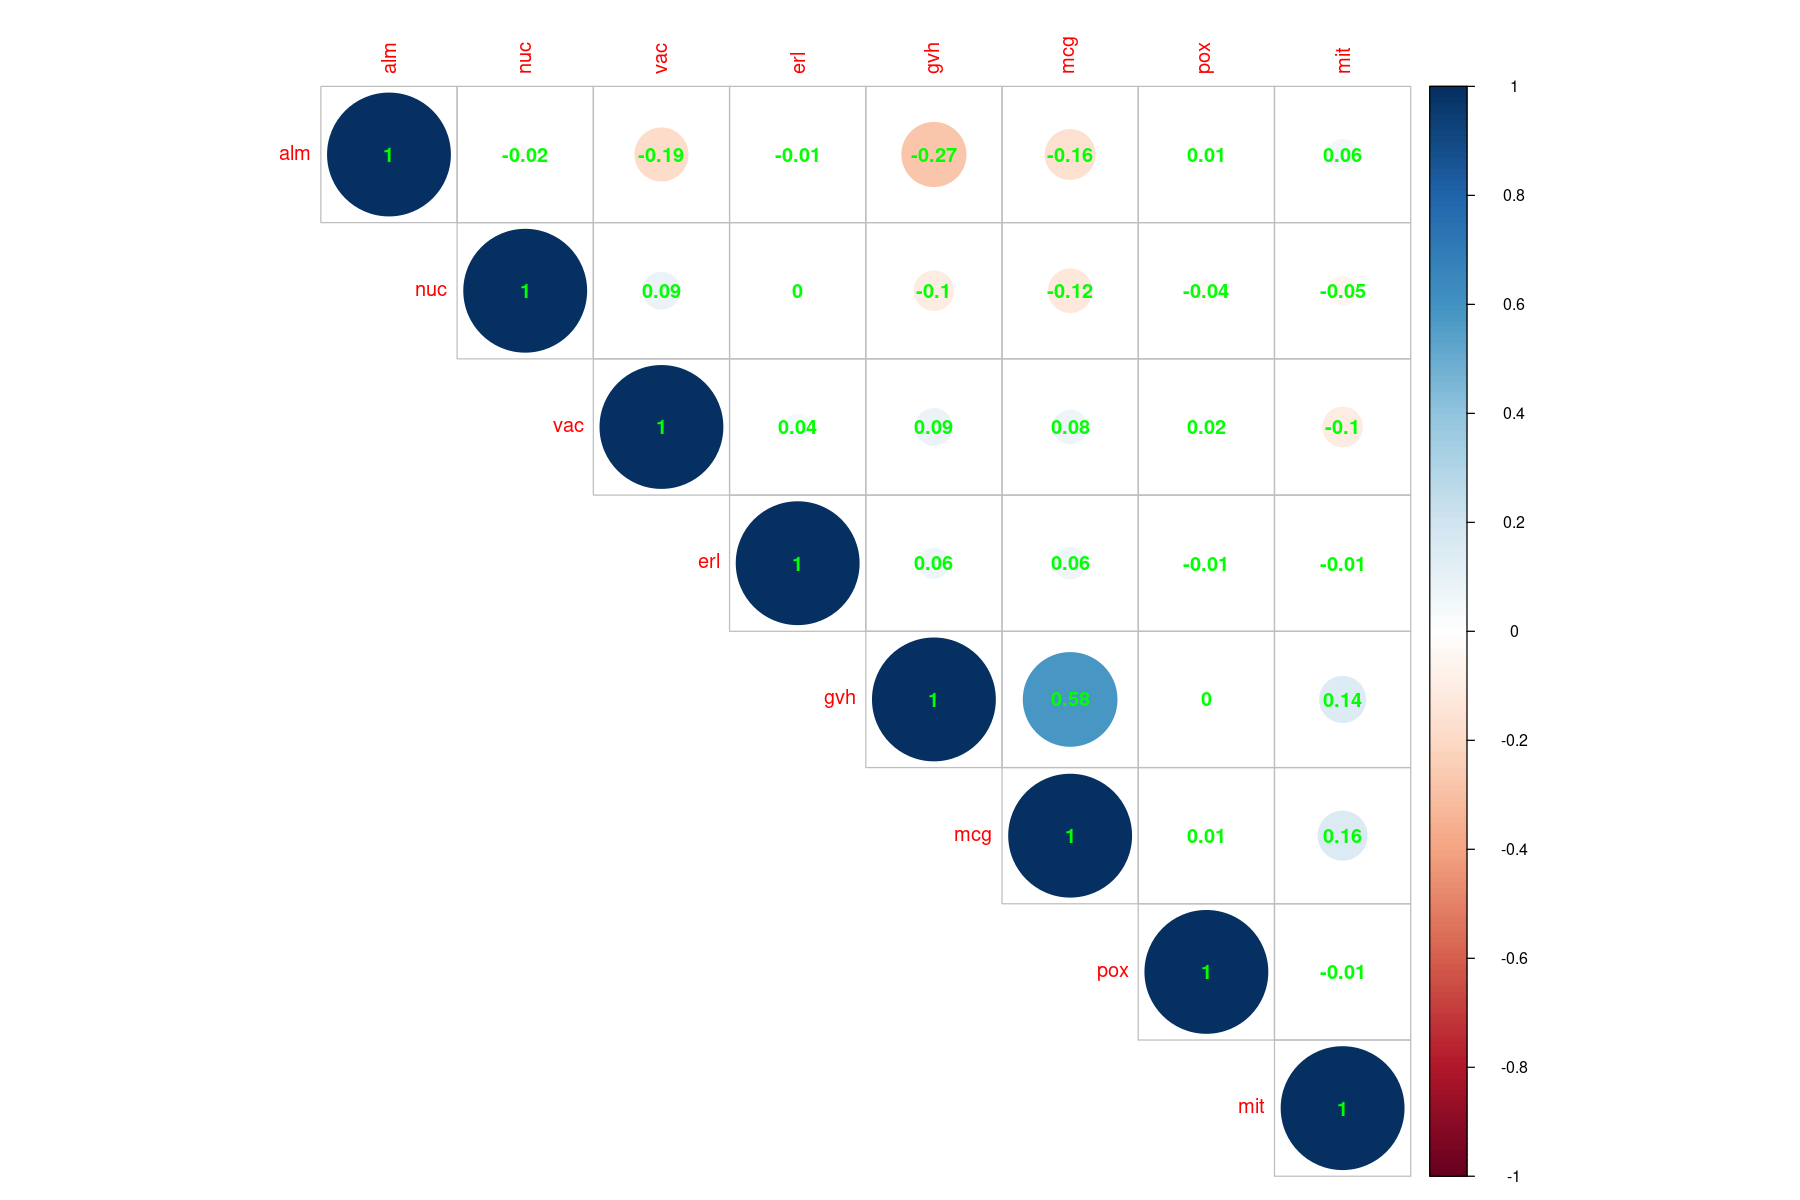

In [7]:
corrplot(yeast_corr, order = 'AOE', type = 'upper', addCoef.col = 'green')

## Box plot

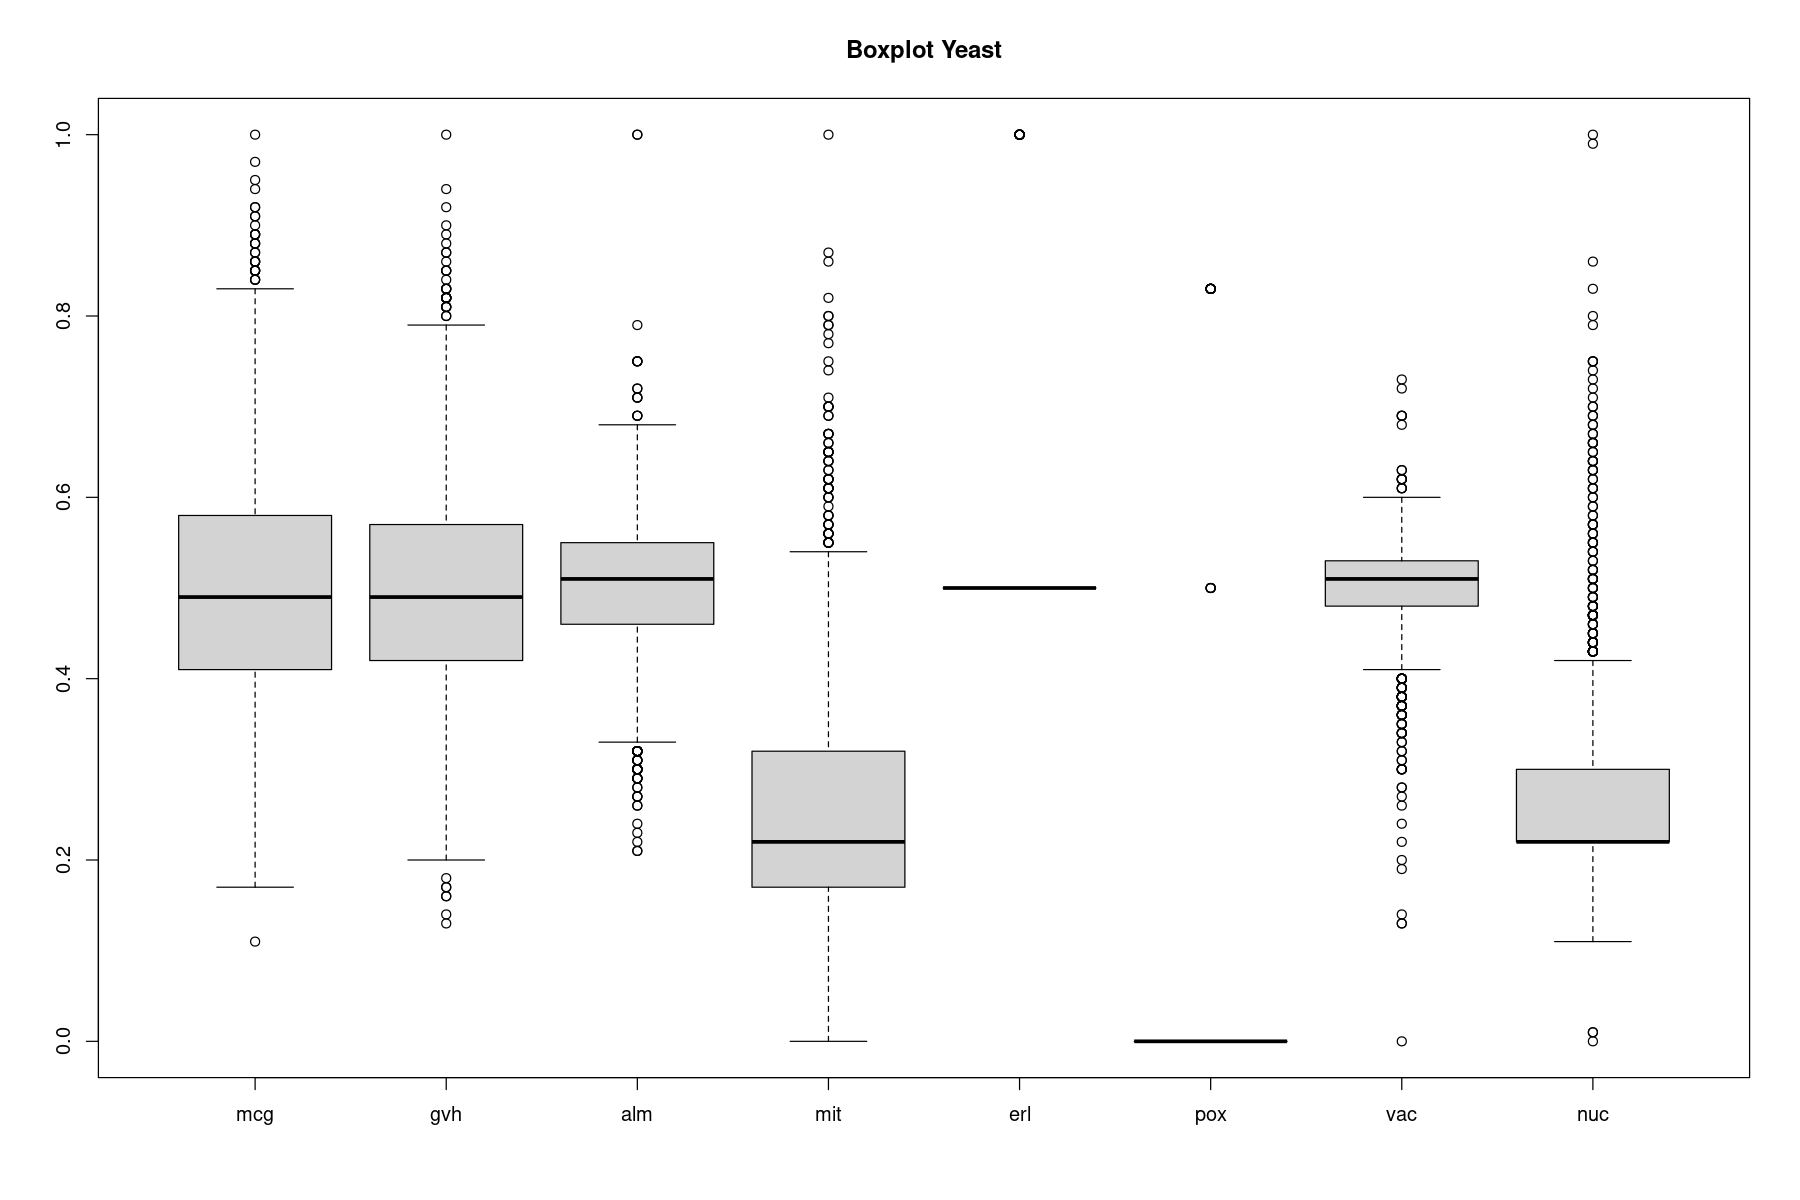

In [8]:
boxplot(yeast[col_numeric], main = "Boxplot Yeast")

## Histogram and Skewness

In [9]:
for(col_name in names(yeast[col_numeric])) {
    column <- yeast[, col_name]
    print(paste("Skewness of", col_name, ":", skewness(column)))
}

[1] "Skewness of mcg : 0.603680183352786"
[1] "Skewness of gvh : 0.416218163712166"
[1] "Skewness of alm : -0.220771960489657"
[1] "Skewness of mit : 1.44331540171683"
[1] "Skewness of erl : 10.1493607586647"
[1] "Skewness of pox : 10.2664931041208"
[1] "Skewness of vac : -1.789829183398"
[1] "Skewness of nuc : 2.41059148558253"


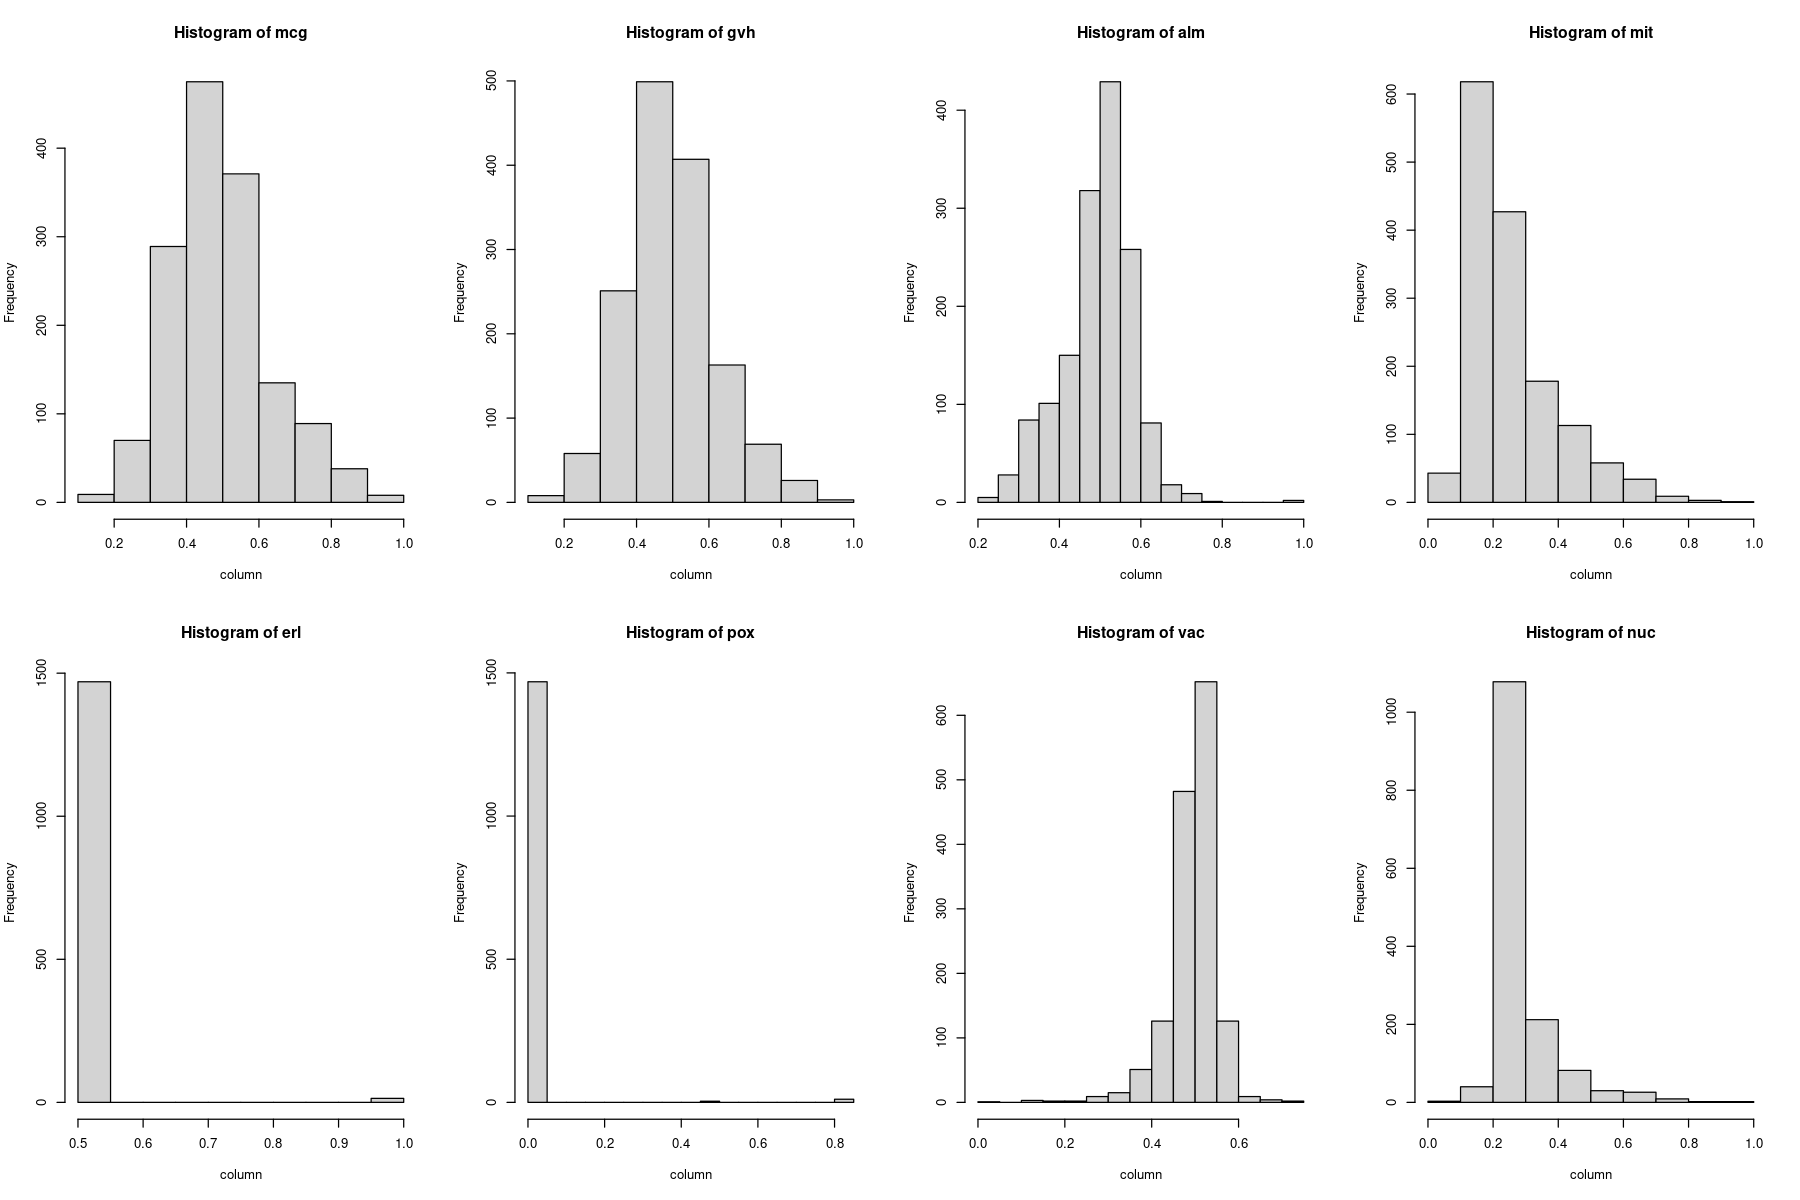

In [10]:
par(mfrow=c(2, 4))
for(col_name in names(yeast[col_numeric])) {
    column <- yeast[, col_name]
    hist(column, main = paste("Histogram of", col_name))
}

## Pair Plot

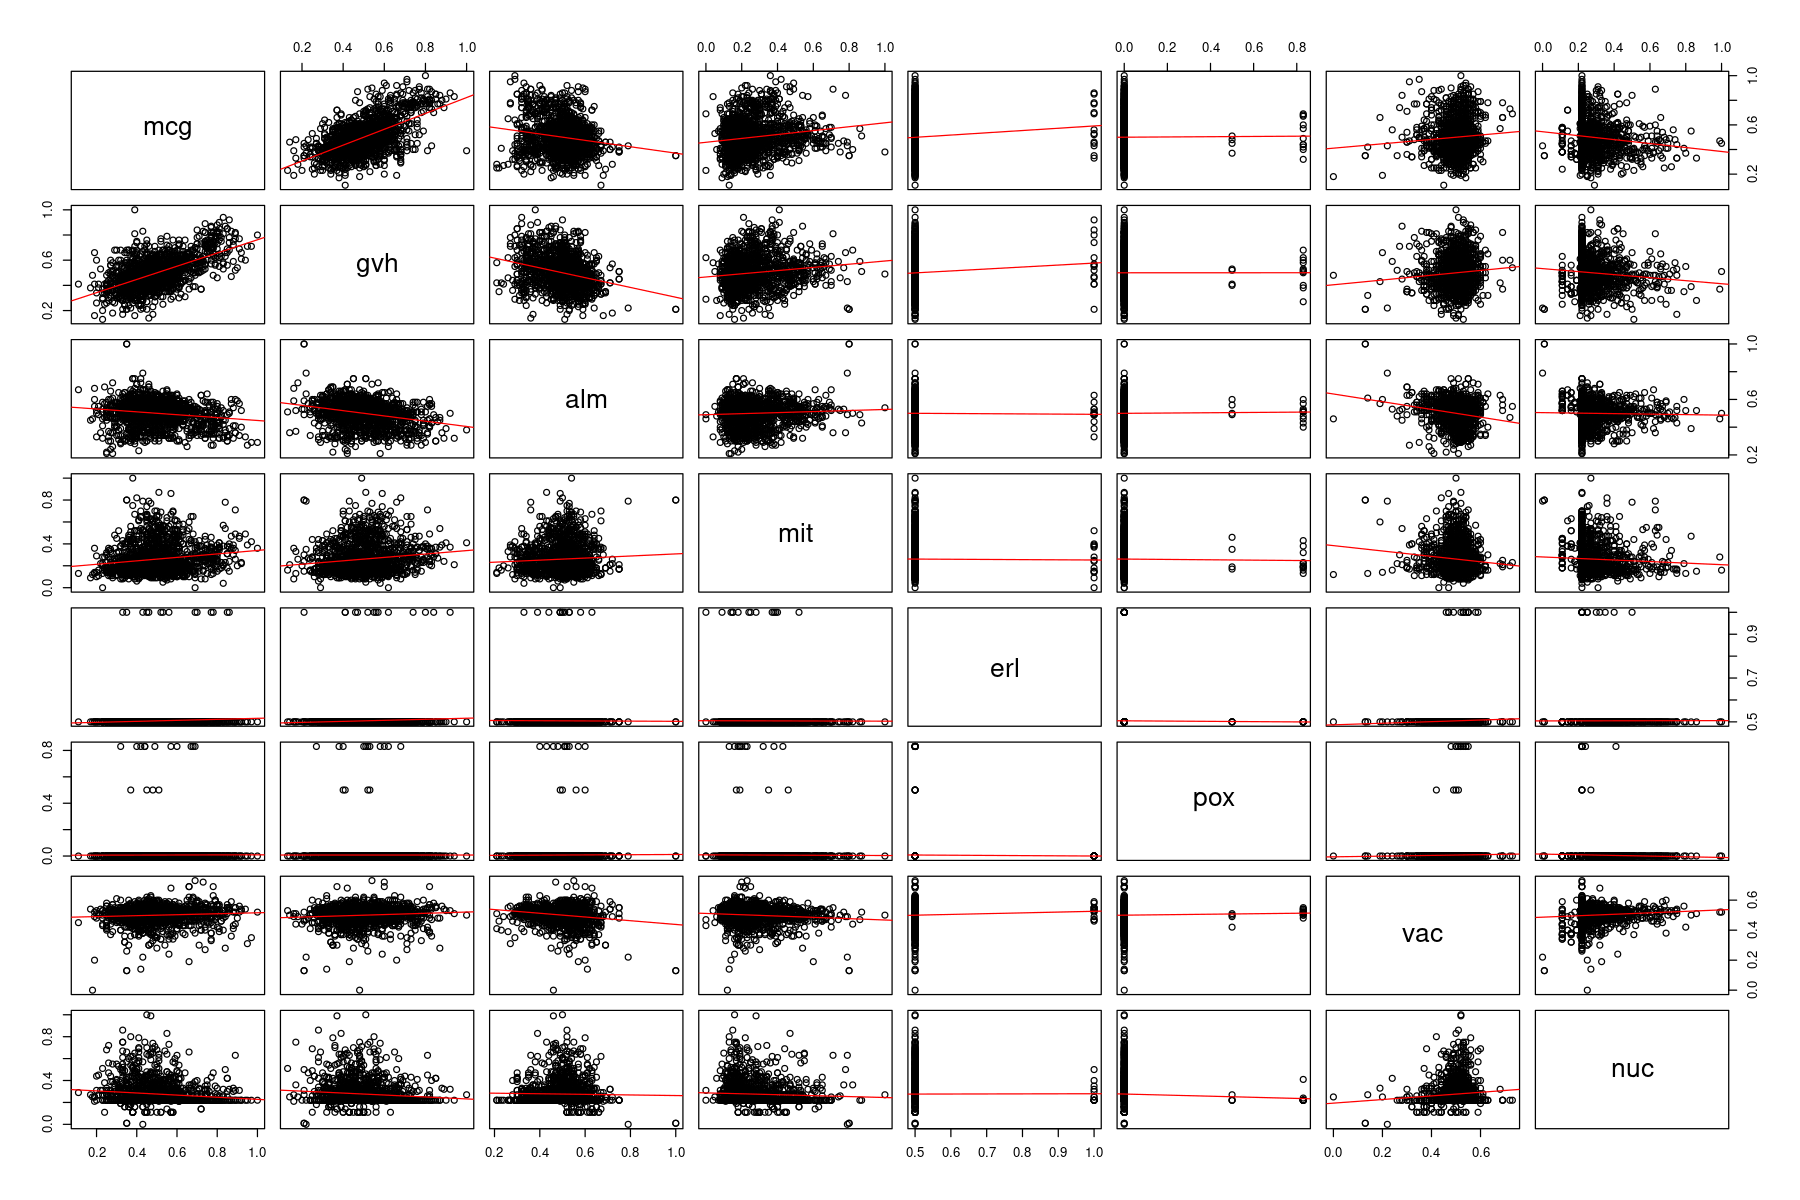

In [11]:
pairs(yeast[col_numeric], panel = function(x, y) {
  points(x, y)
  abline(lm(y~x), col='red')
})

## PCA

In [12]:
yeast_pca <- PCA(yeast[2:10], scale.unit = TRUE, graph = FALSE,
                 quanti.sup = c(5,6), quali.sup = c(9))
summary(yeast_pca)


Call:
PCA(X = yeast[2:10], scale.unit = TRUE, quanti.sup = c(5, 6),  
     quali.sup = c(9), graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6
Variance               1.805   1.268   0.950   0.808   0.763   0.407
% of var.             30.079  21.138  15.829  13.460  12.718   6.776
Cumulative % of var.  30.079  51.217  67.046  80.506  93.224 100.000

Individuals (the 10 first)
        Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr
1   |  1.601 |  0.888  0.029  0.308 | -0.114  0.001  0.005 | -0.973  0.067
2   |  1.659 |  0.829  0.026  0.249 | -0.181  0.002  0.012 | -0.368  0.010
3   |  1.789 |  1.297  0.063  0.525 | -0.398  0.008  0.049 | -0.815  0.047
4   |  1.703 | -0.227  0.002  0.018 | -0.265  0.004  0.024 | -0.868  0.053
5   |  2.272 | -0.160  0.001  0.005 |  1.258  0.084  0.307 |  0.686  0.033
6   |  1.373 | -0.791  0.023  0.332 |  0.274  0.004  0.040 | -0.770  0.042
7   |  2.959 |  1.011  0.038  0.117 |  1.247  0

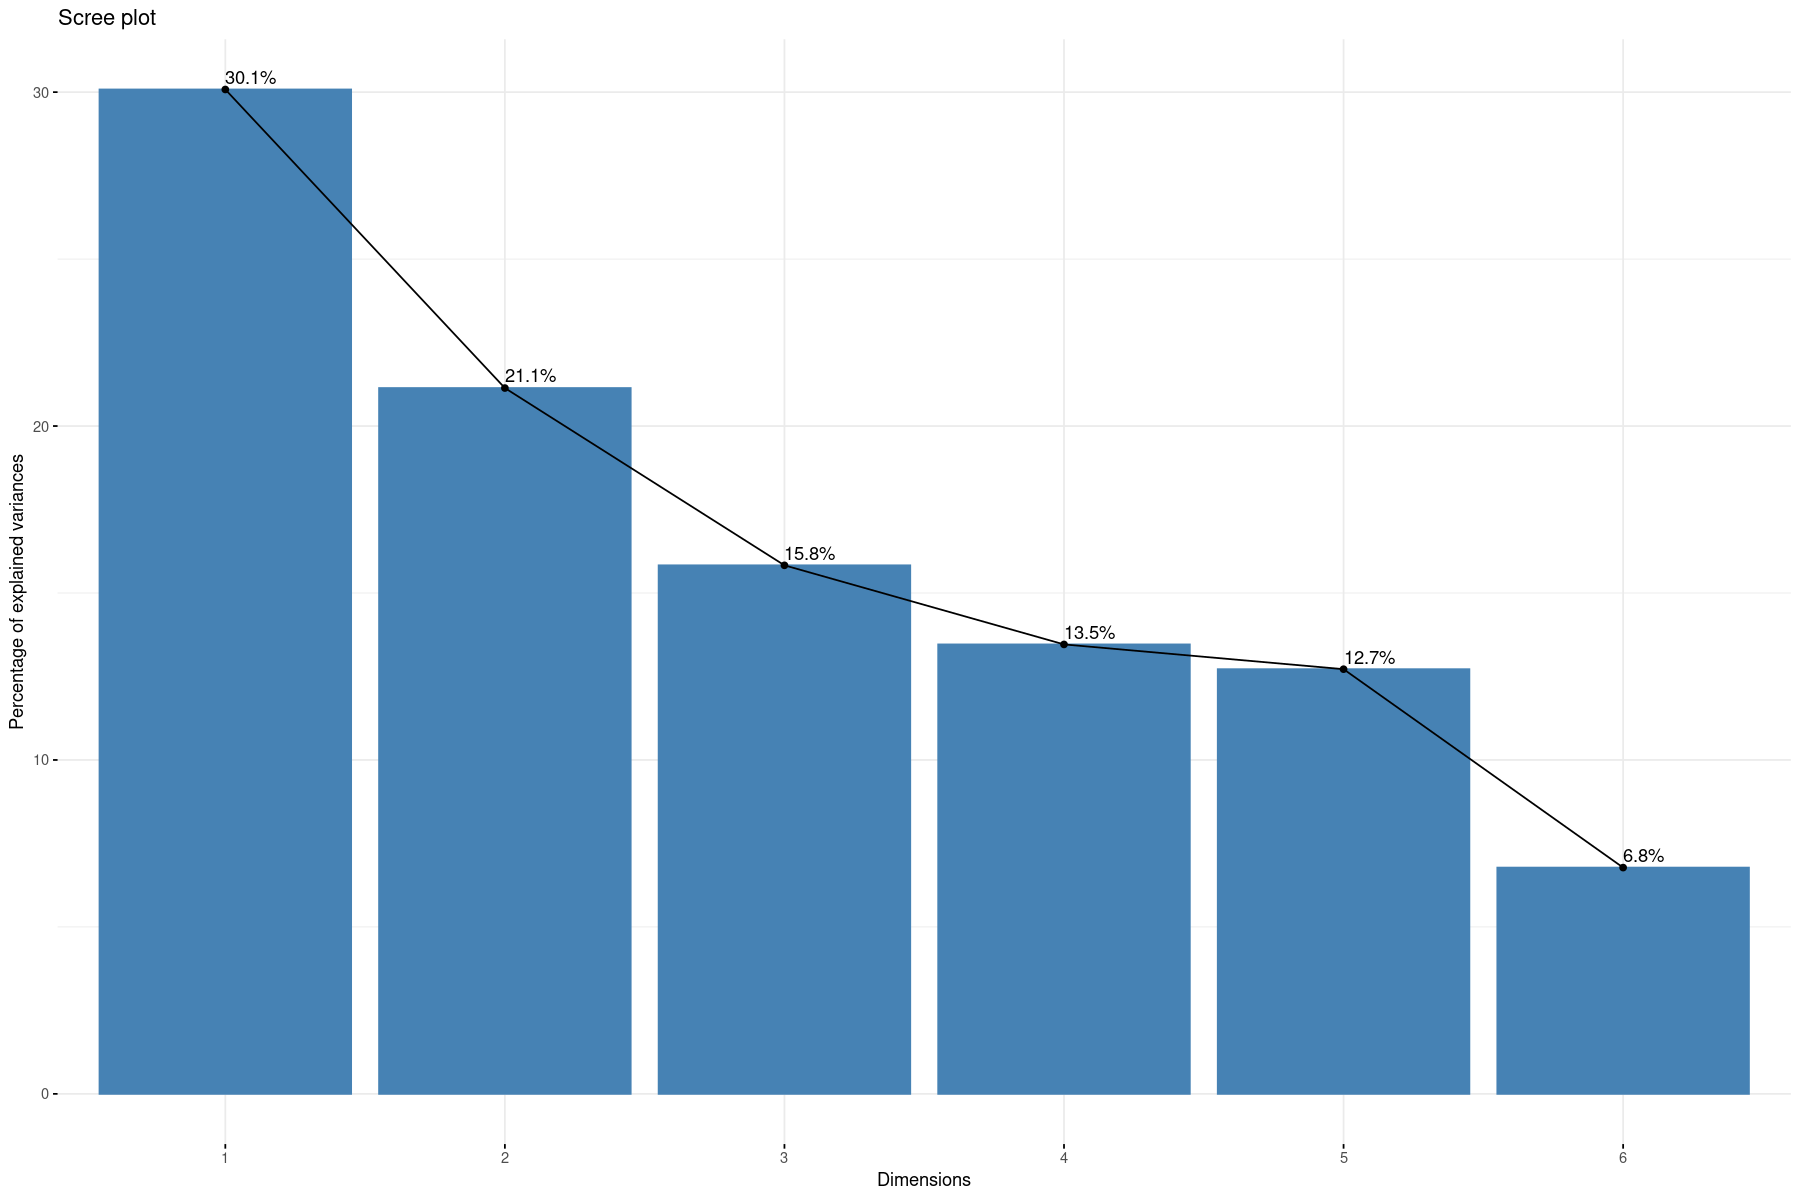

In [13]:
fviz_eig(yeast_pca, addlabels = TRUE)

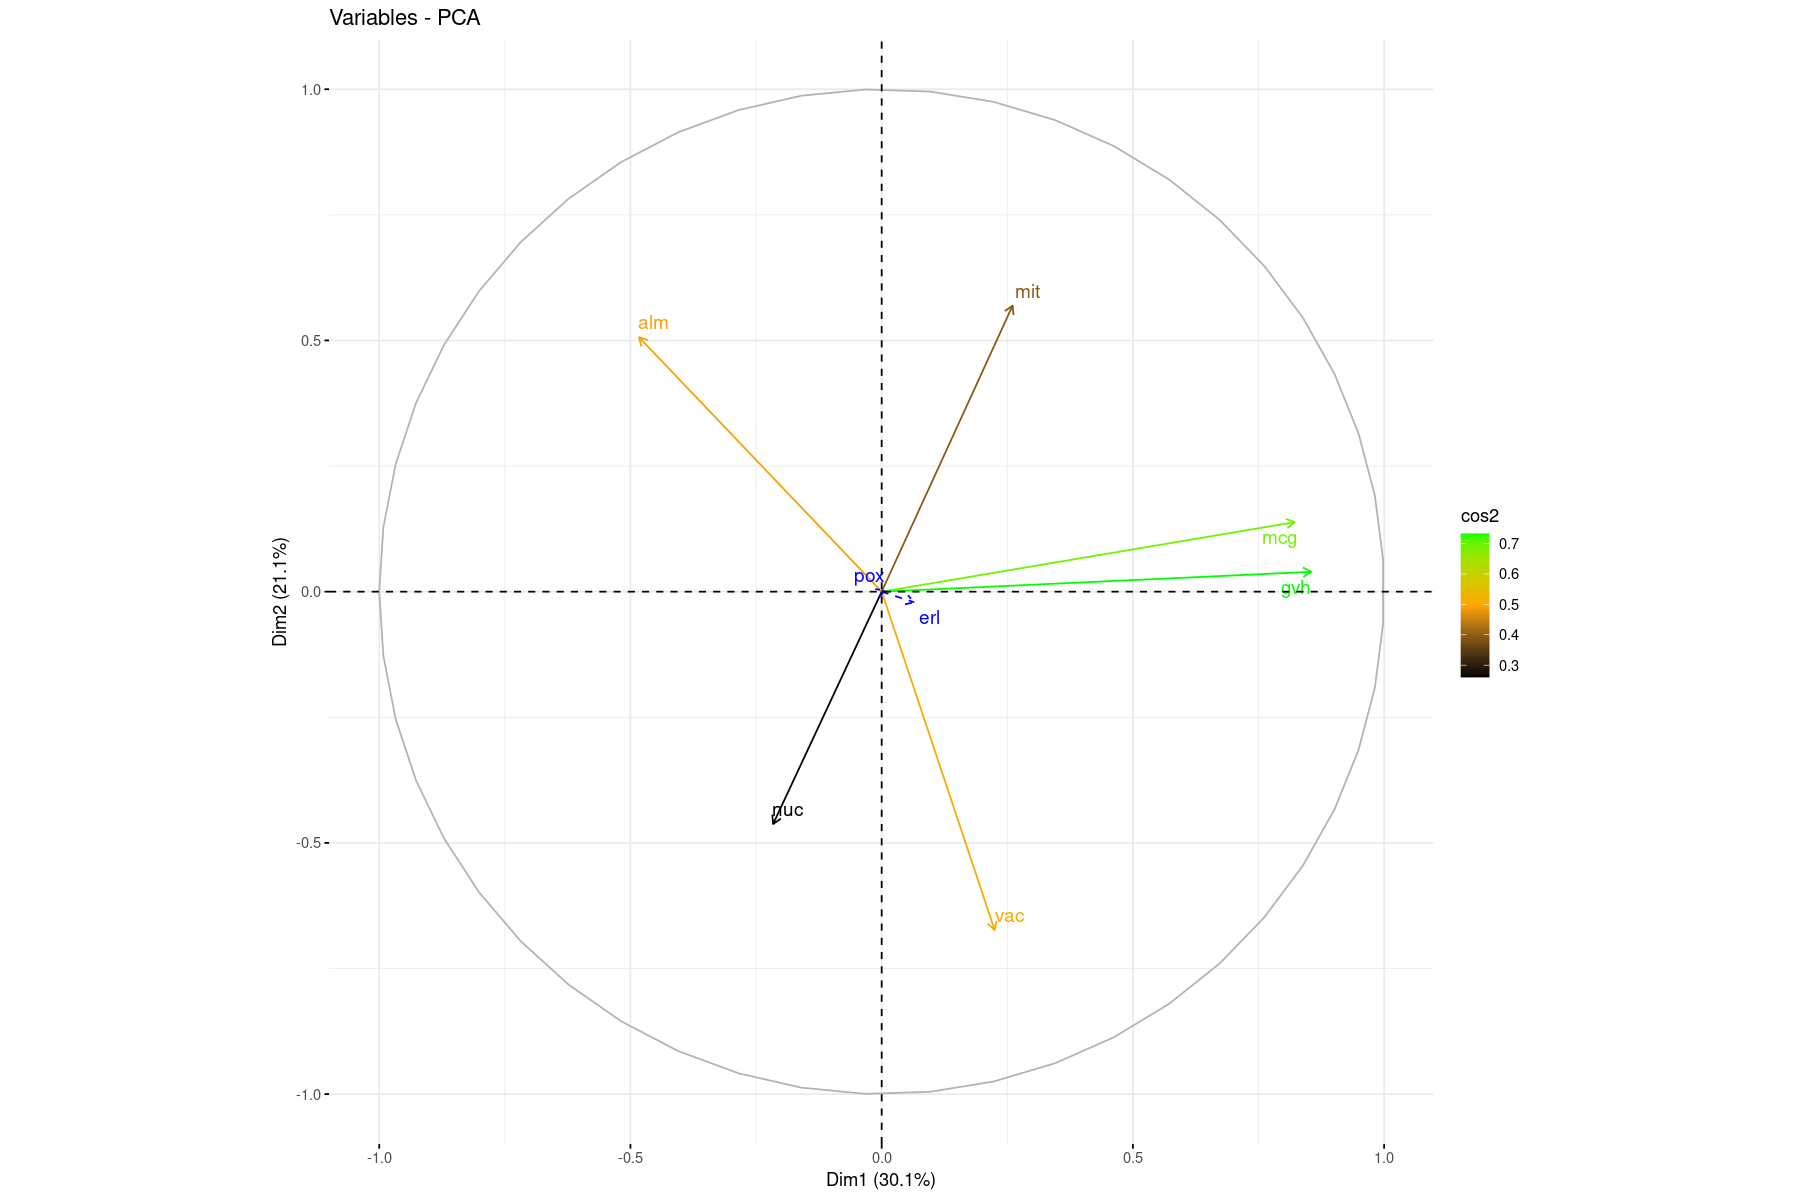

In [14]:
fviz_pca_var(yeast_pca, col.var = "cos2",
             gradient.cols = c("black", "orange", "green"), repel = TRUE)

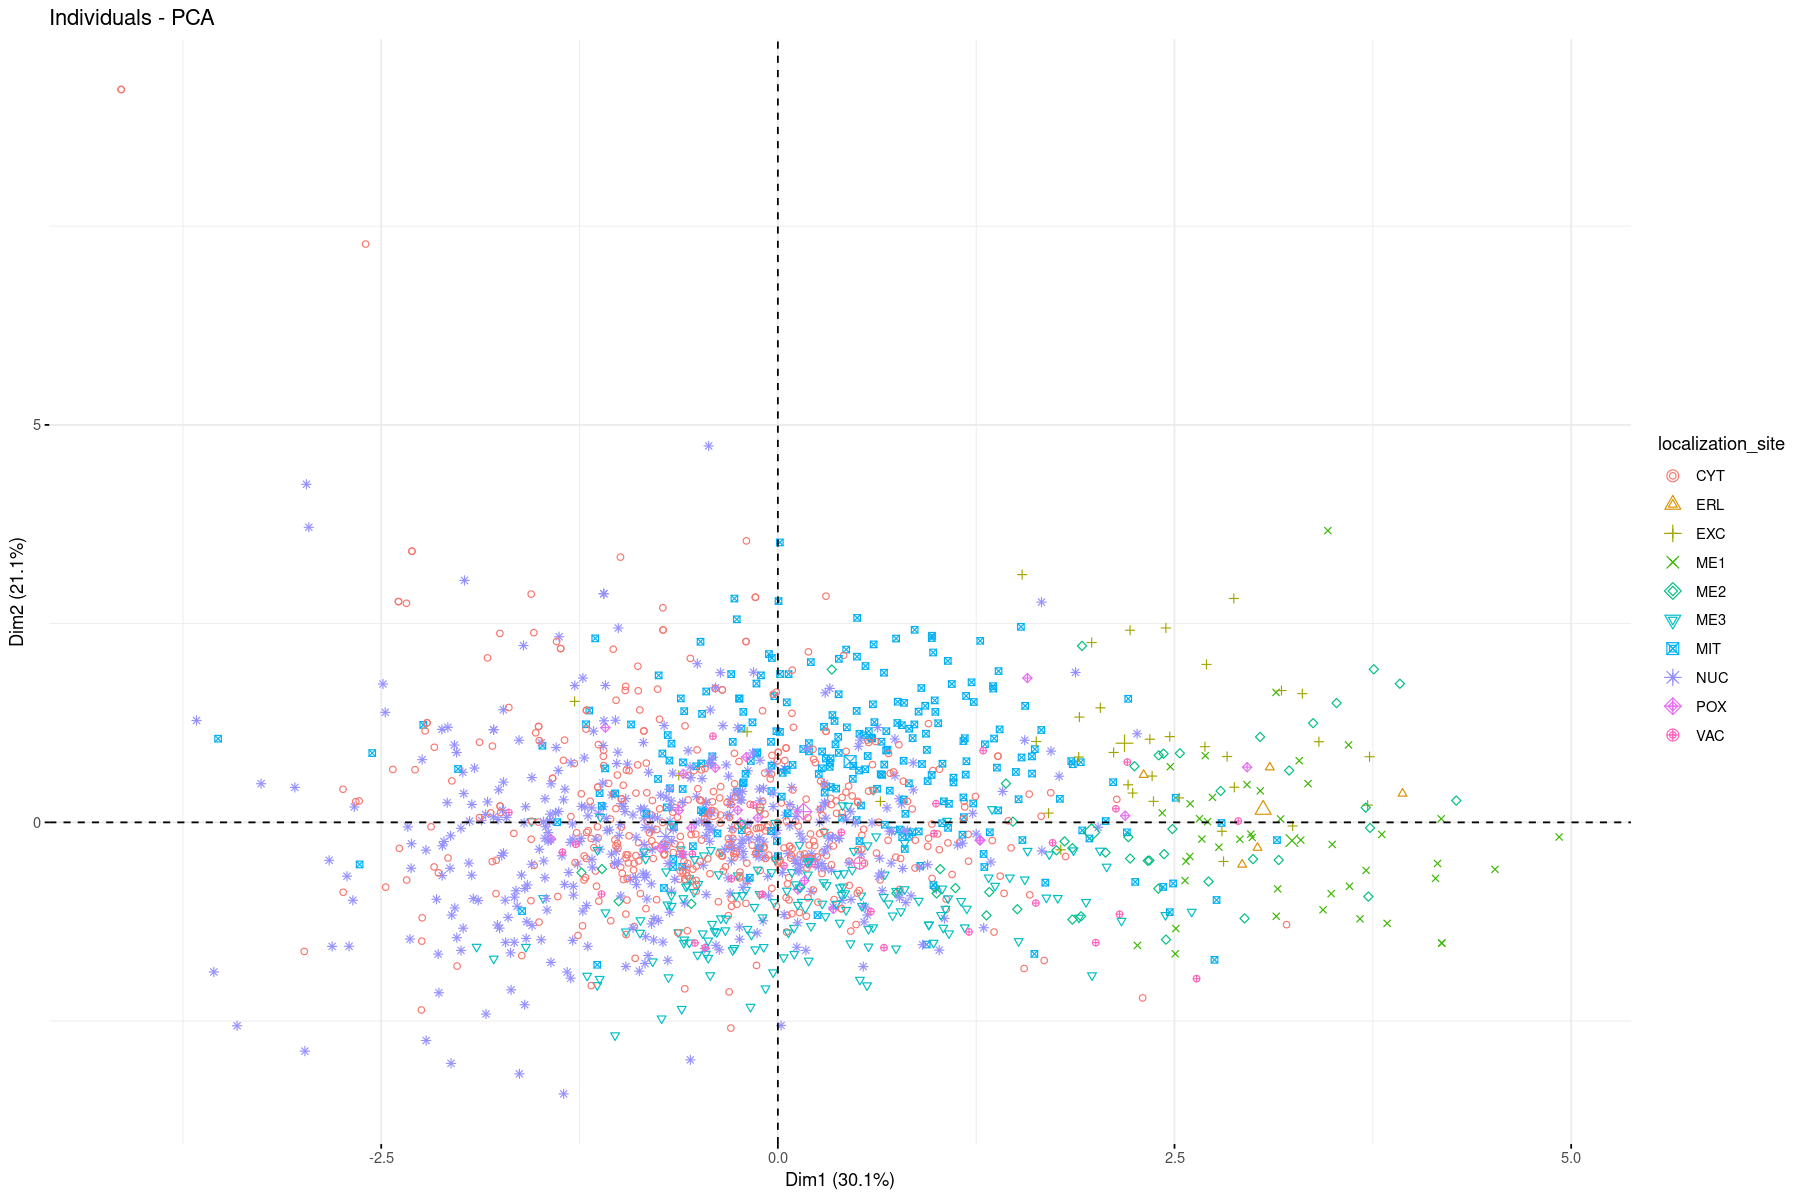

In [15]:
fviz_pca_ind(yeast_pca, geom = "point", habillage = 9)

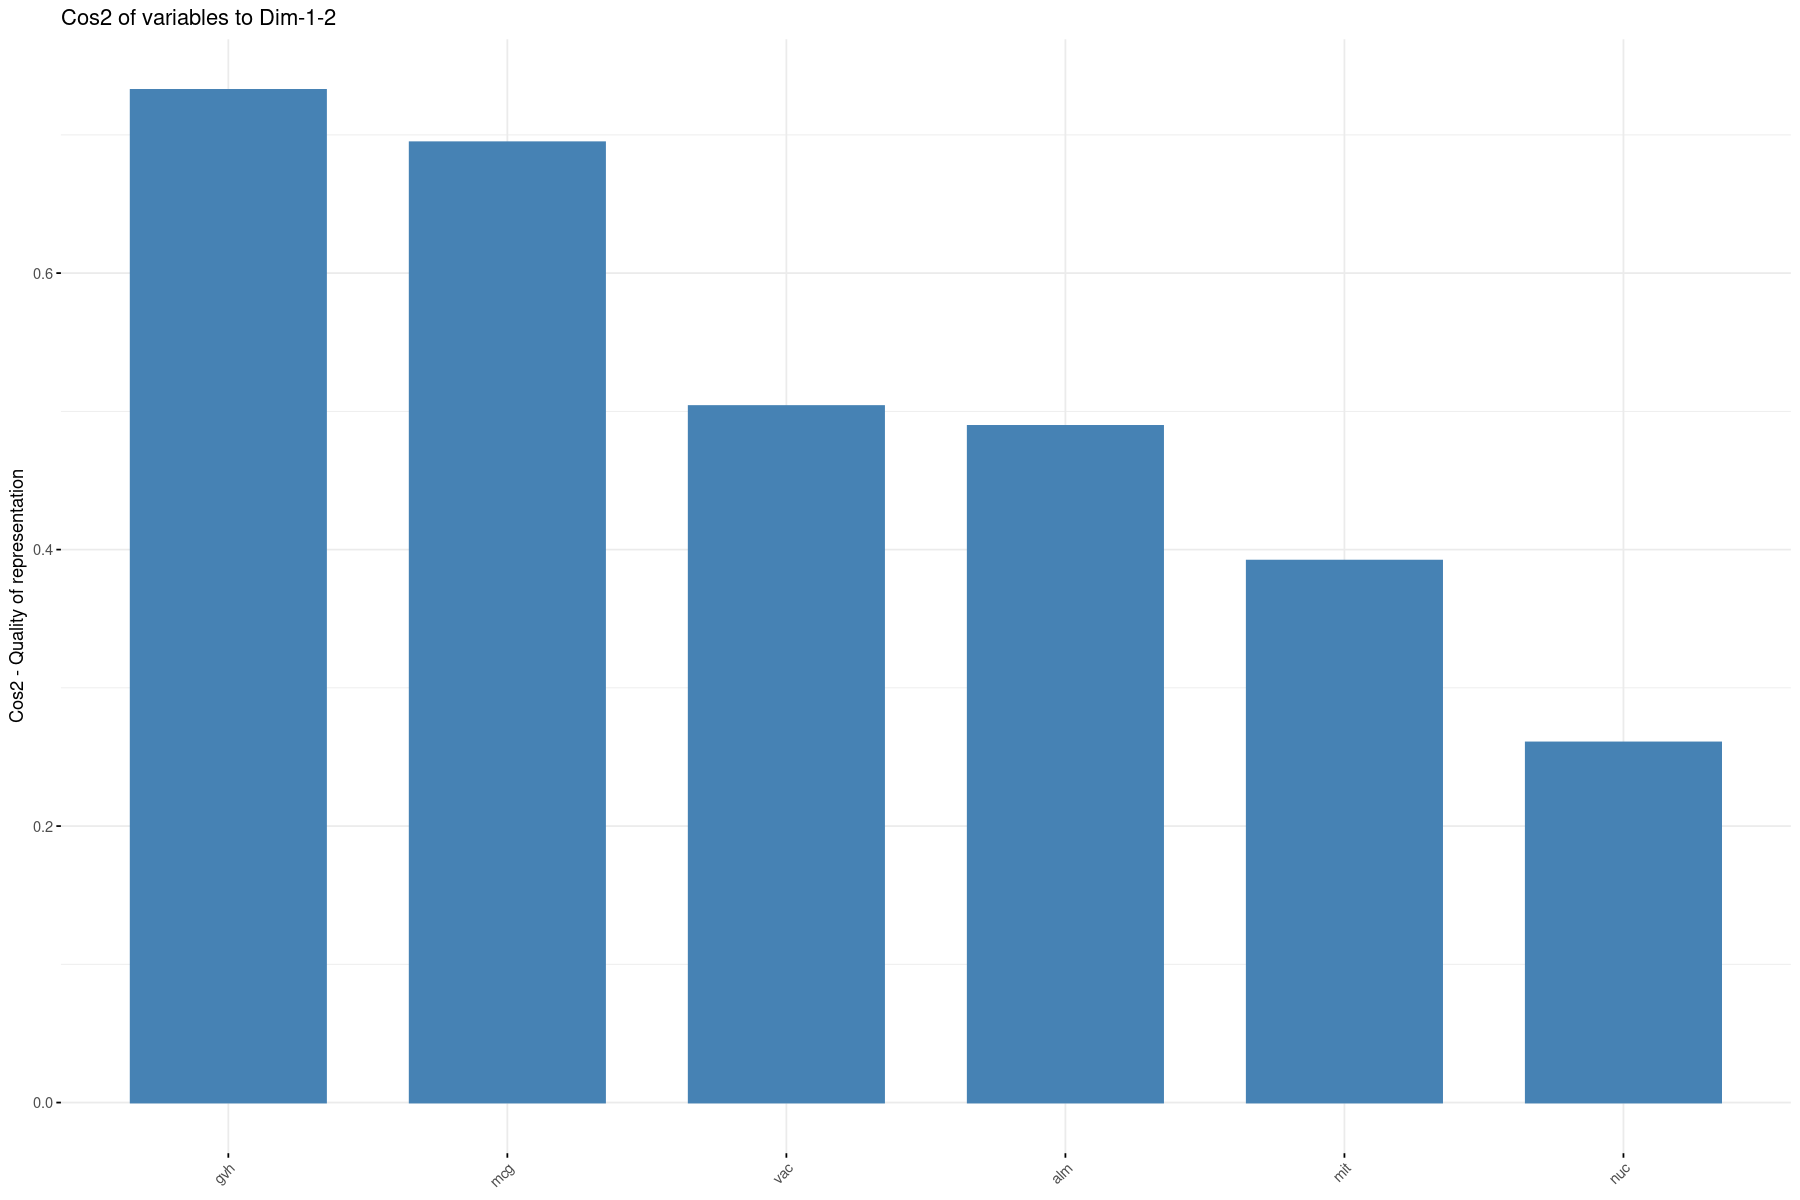

In [16]:
fviz_cos2(yeast_pca, choice = "var", axes = 1:2)

## Clustering

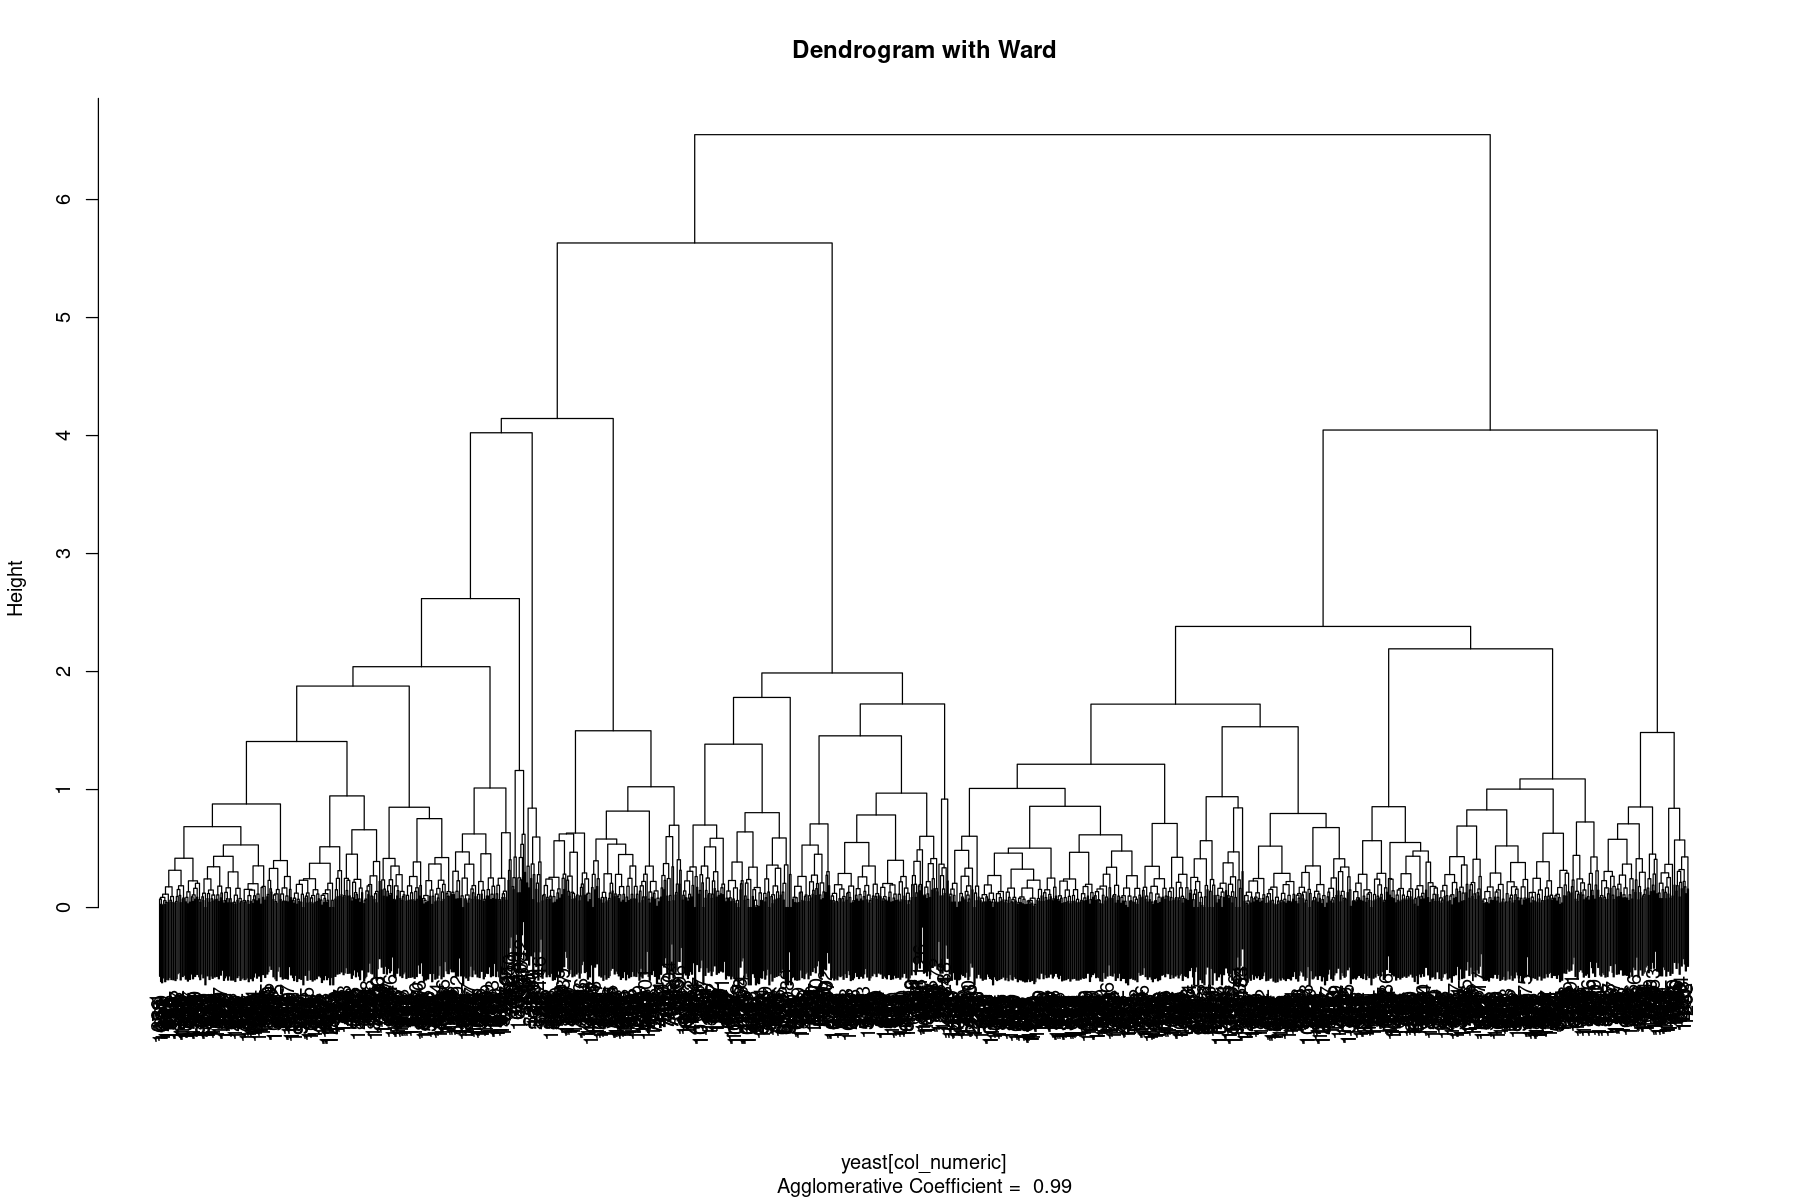

In [17]:
agnes_result <- agnes(yeast[col_numeric], method = "ward")
plot(agnes_result, which.plot = 2, main = "Dendrogram with Ward")

In [18]:
get_best_nb_clusters <- function(df, name_index, use_min = TRUE, graph = TRUE) {
    cluster_sizes <- c(2:11)
    index_list <- list()
    for(size in cluster_sizes) {
        set.seed(1)
        kmeans_result <- kmeans(df, centers = size)
        cluster_assignments <- kmeans_result$cluster
        index <- intCriteria(as.matrix(df), cluster_assignments, c(name_index))
        index_list[length(index_list) + 1] = index 
    }
    if(graph) {
        plot(cluster_sizes, index_list, type = "b", 
             xlab = "Number of clusters", ylab = name_index, 
             main = paste(name_index, "vs. Number of Clusters")
        )
    }
    if(use_min) {
        best_index = which.min(index_list)
    } else {
        best_index = which.max(index_list)
    }
    best_cluster_size <- cluster_sizes[best_index]
    return(best_cluster_size)
}

[1] "Best cluster size for : Calinski_Harabasz 2"


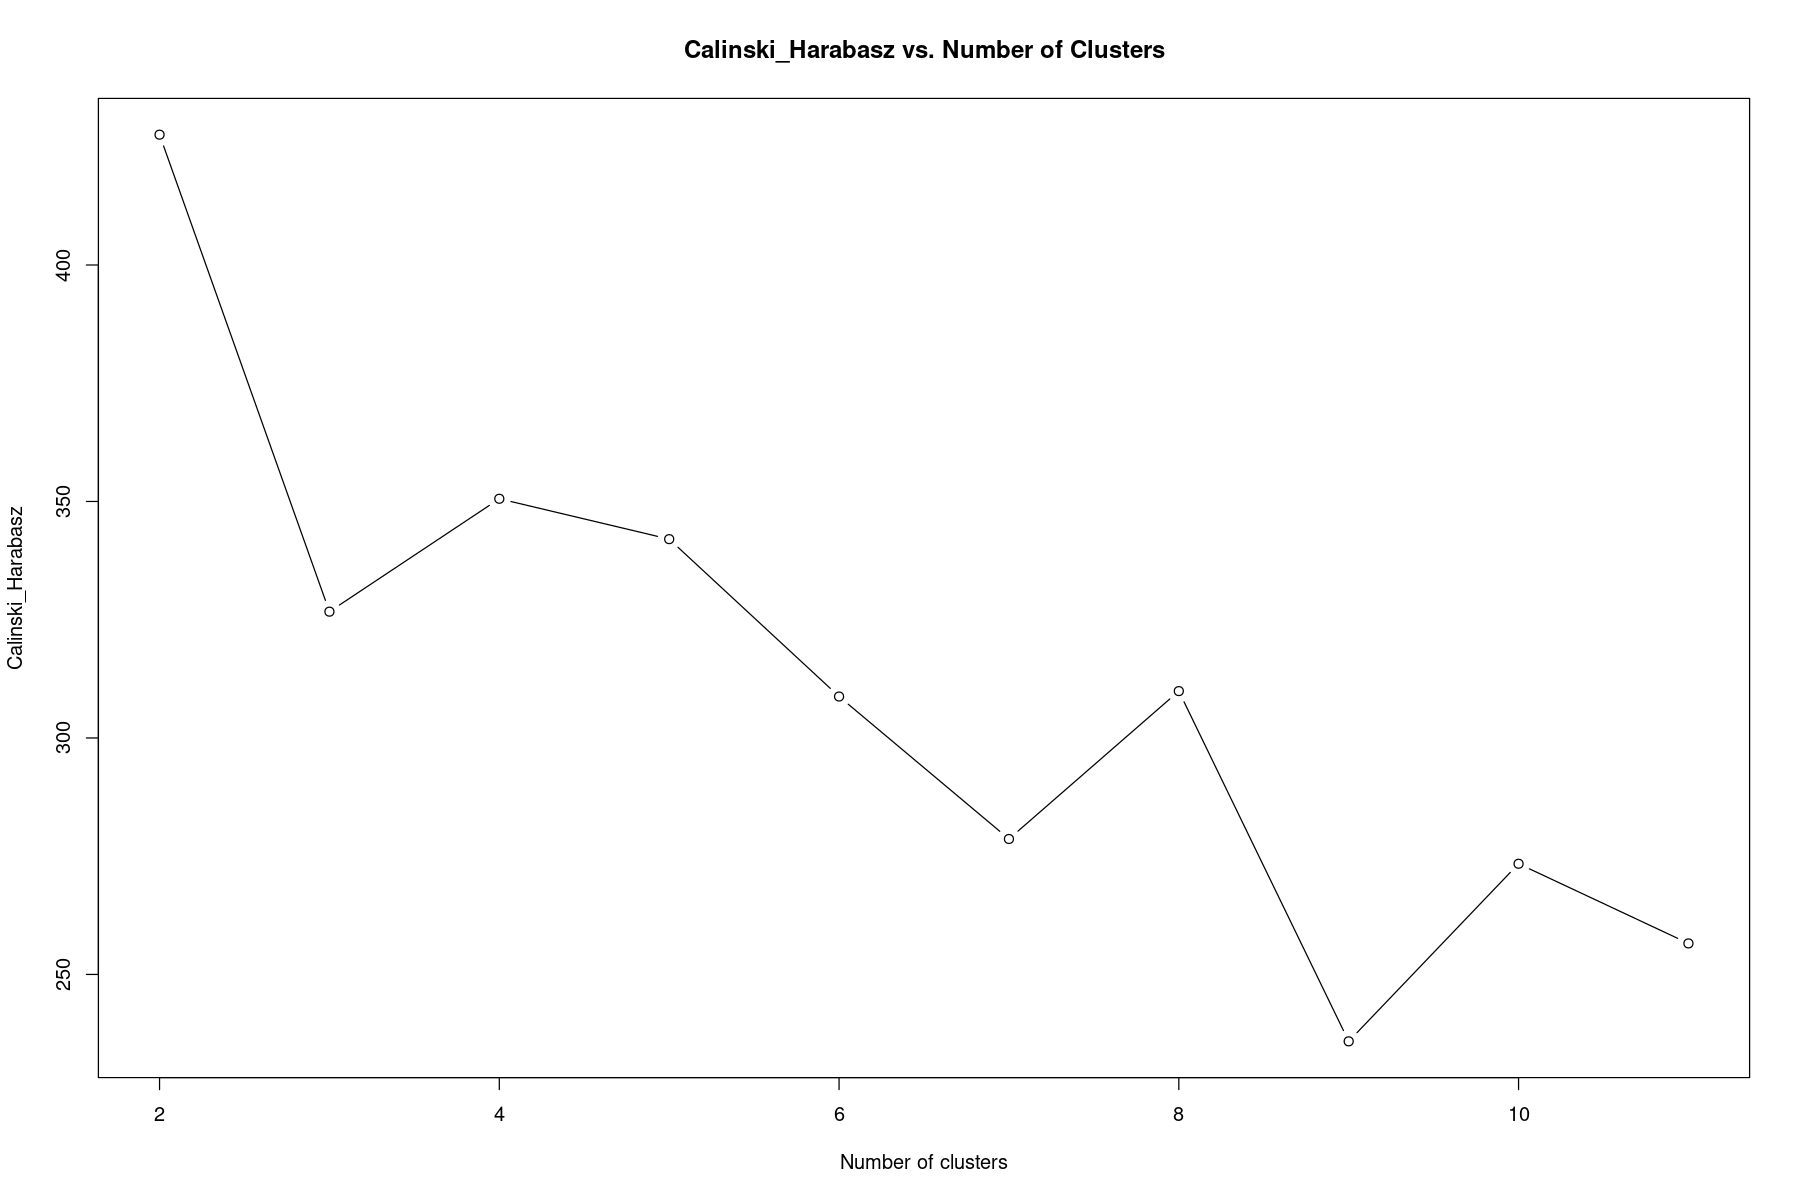

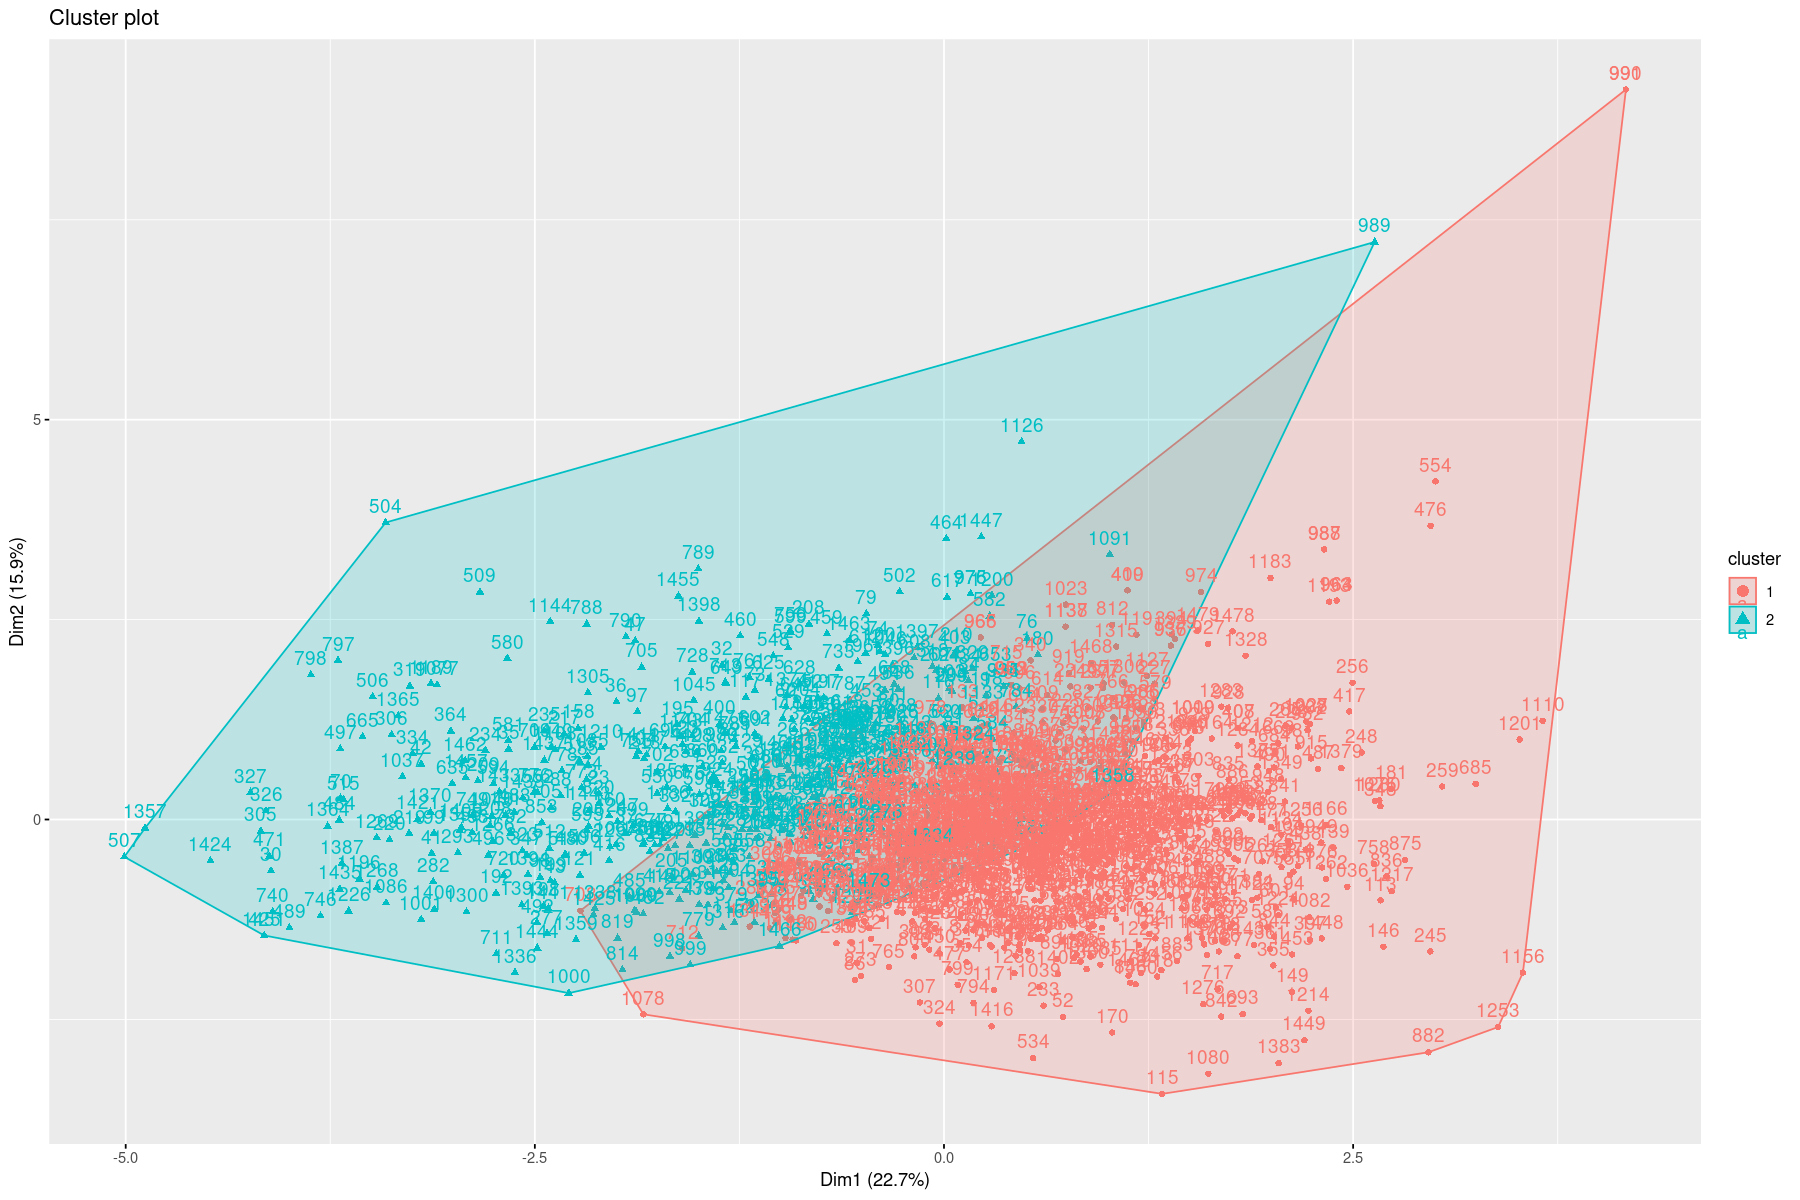

[1] "Best cluster size for : Davies_Bouldin 10"

  1   2   3   4   5   6   7   8   9  10 
 80  87 245  15 109 112 301 184 176 175 
[1] "Purity : 0.355795148247978"


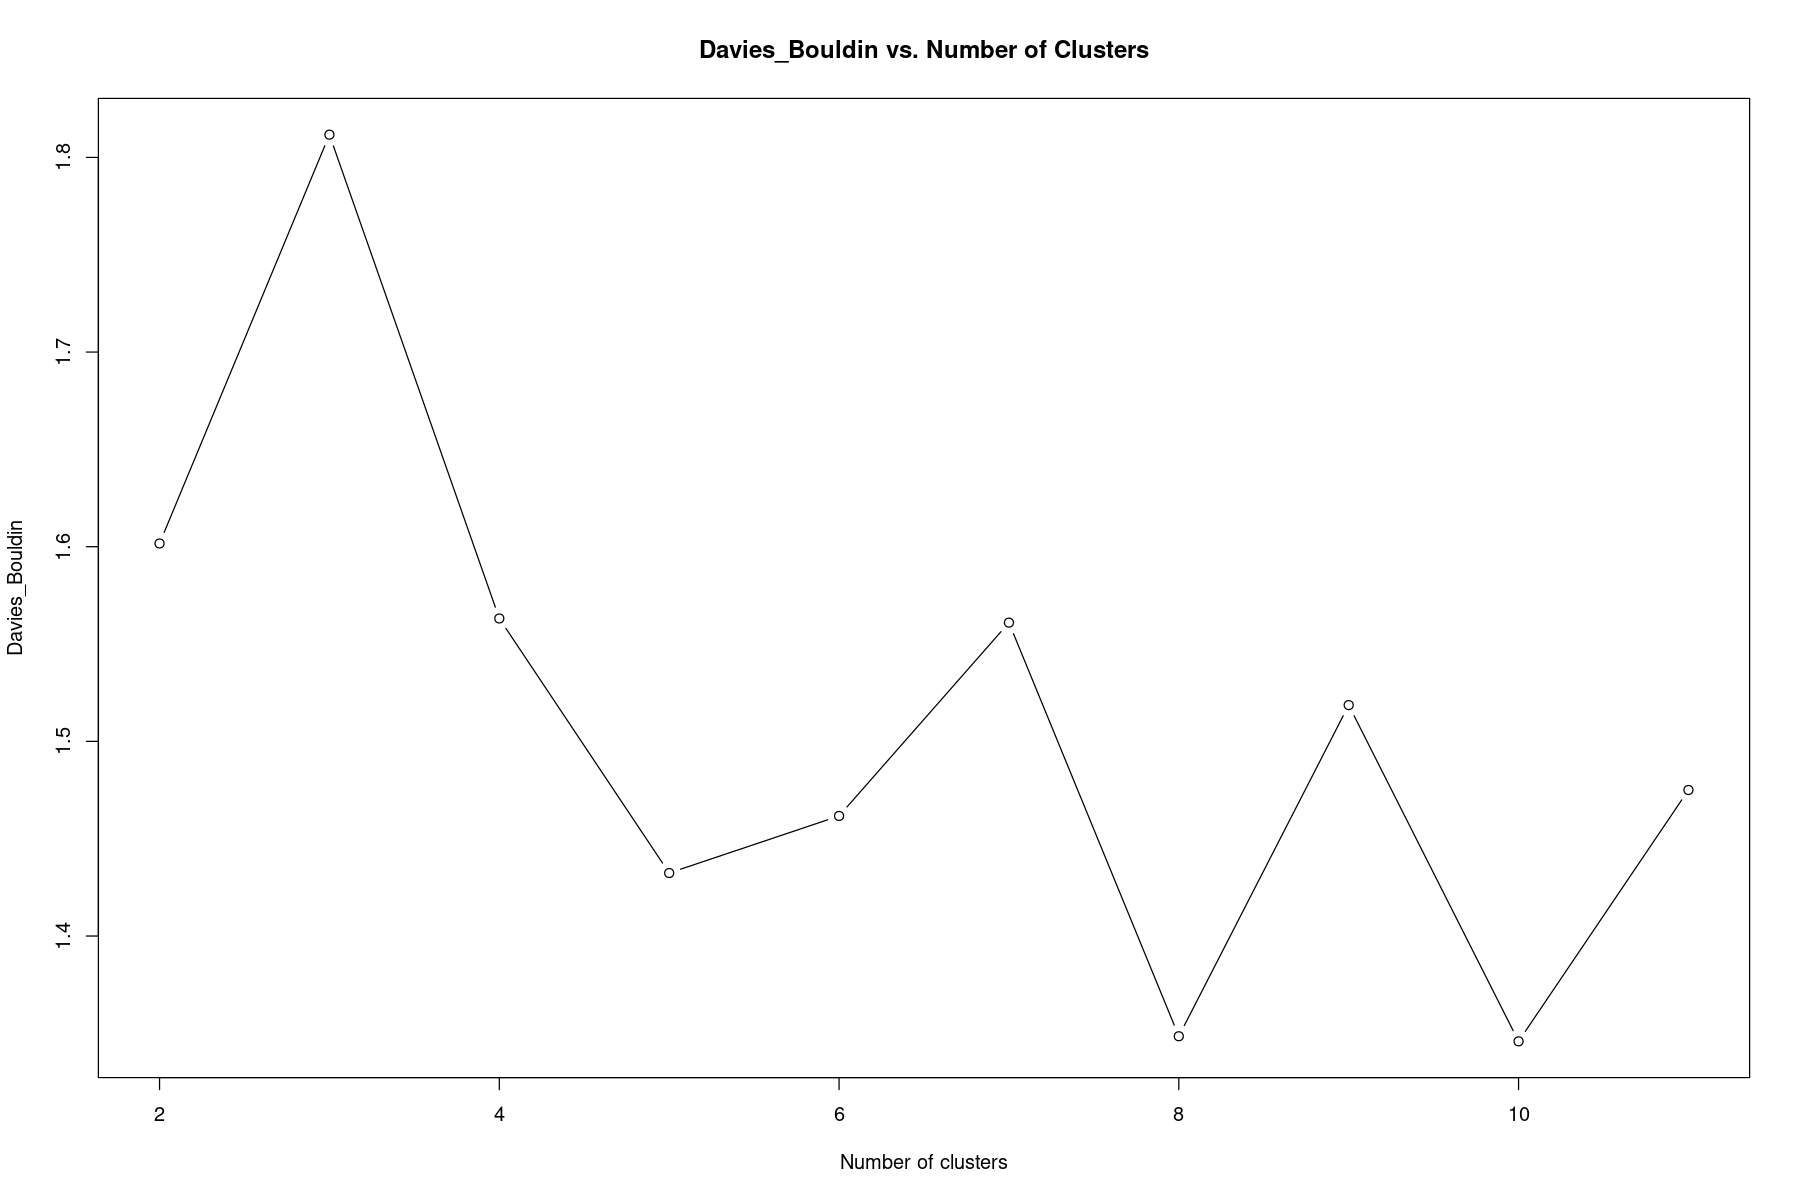

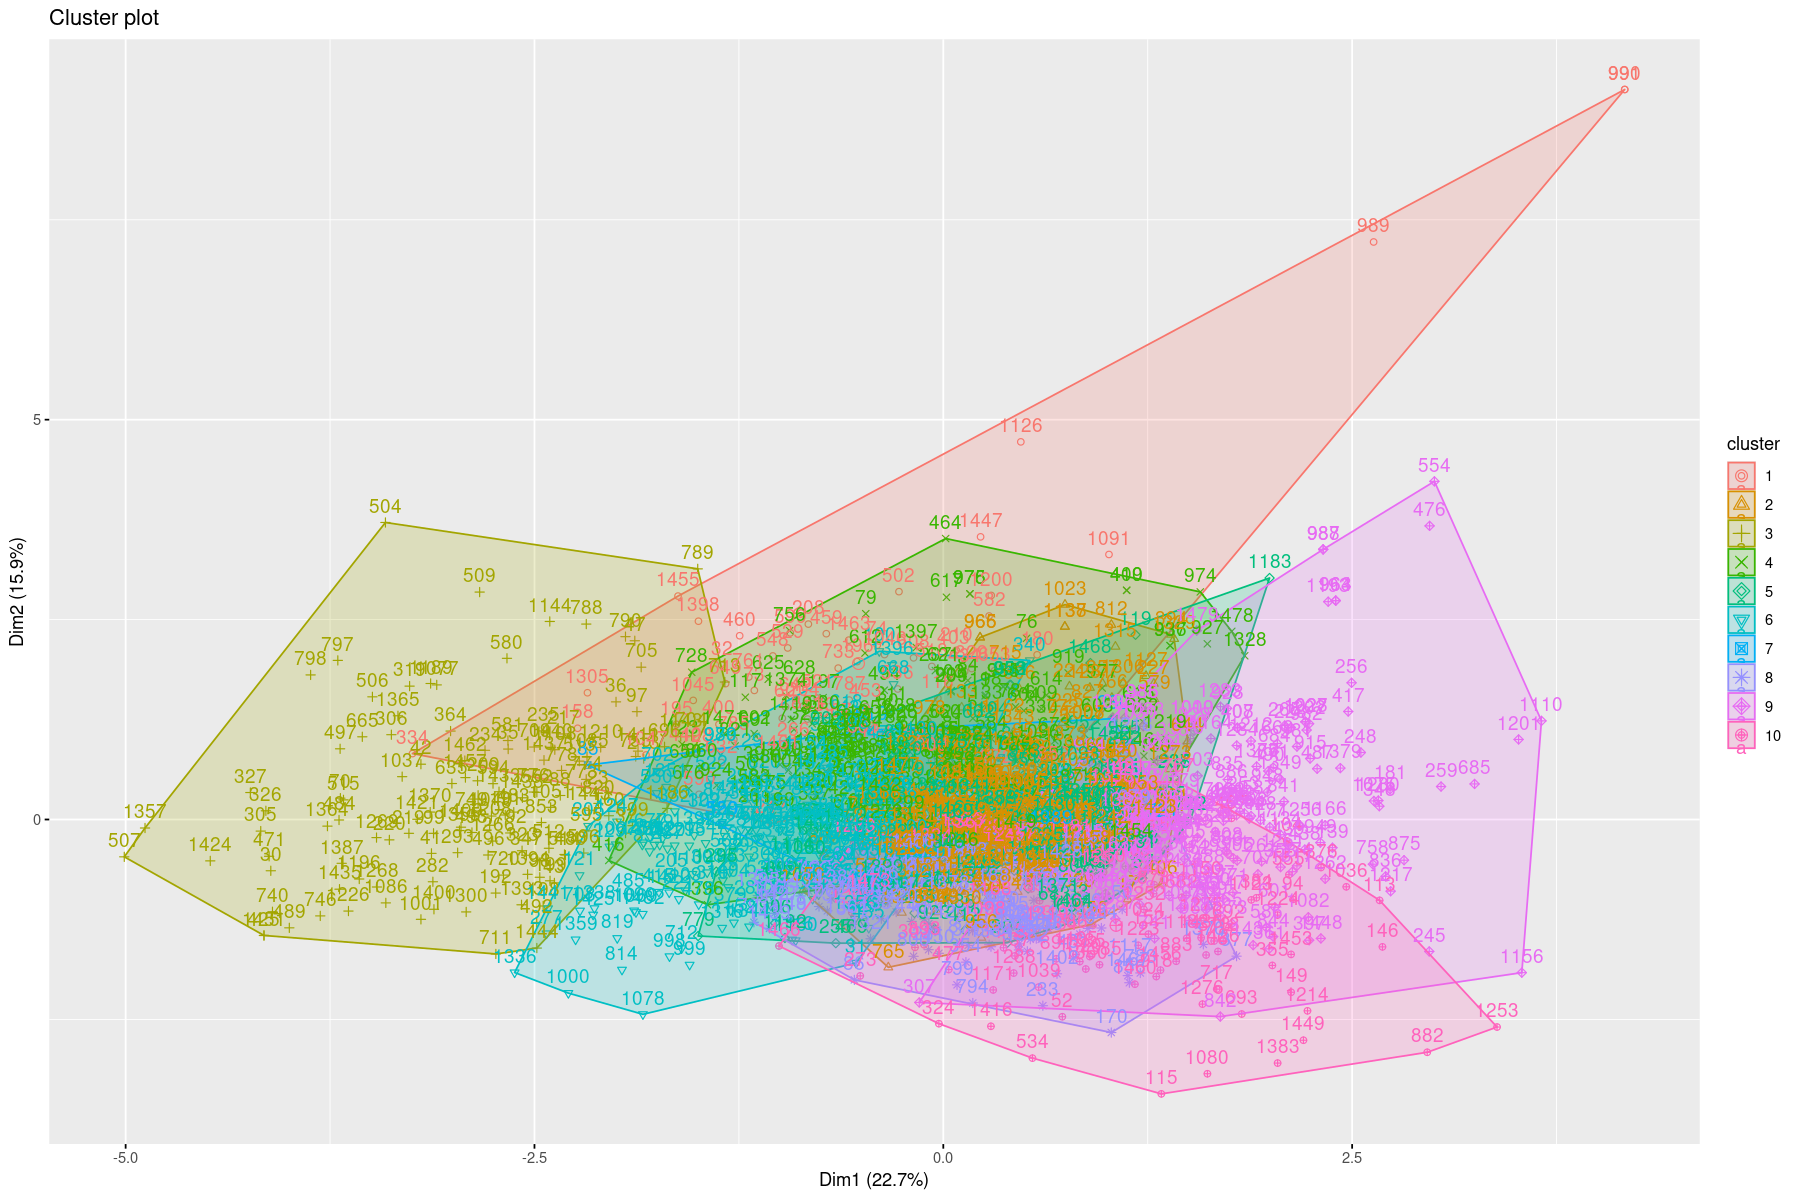

[1] "Best cluster size for : Silhouette 2"


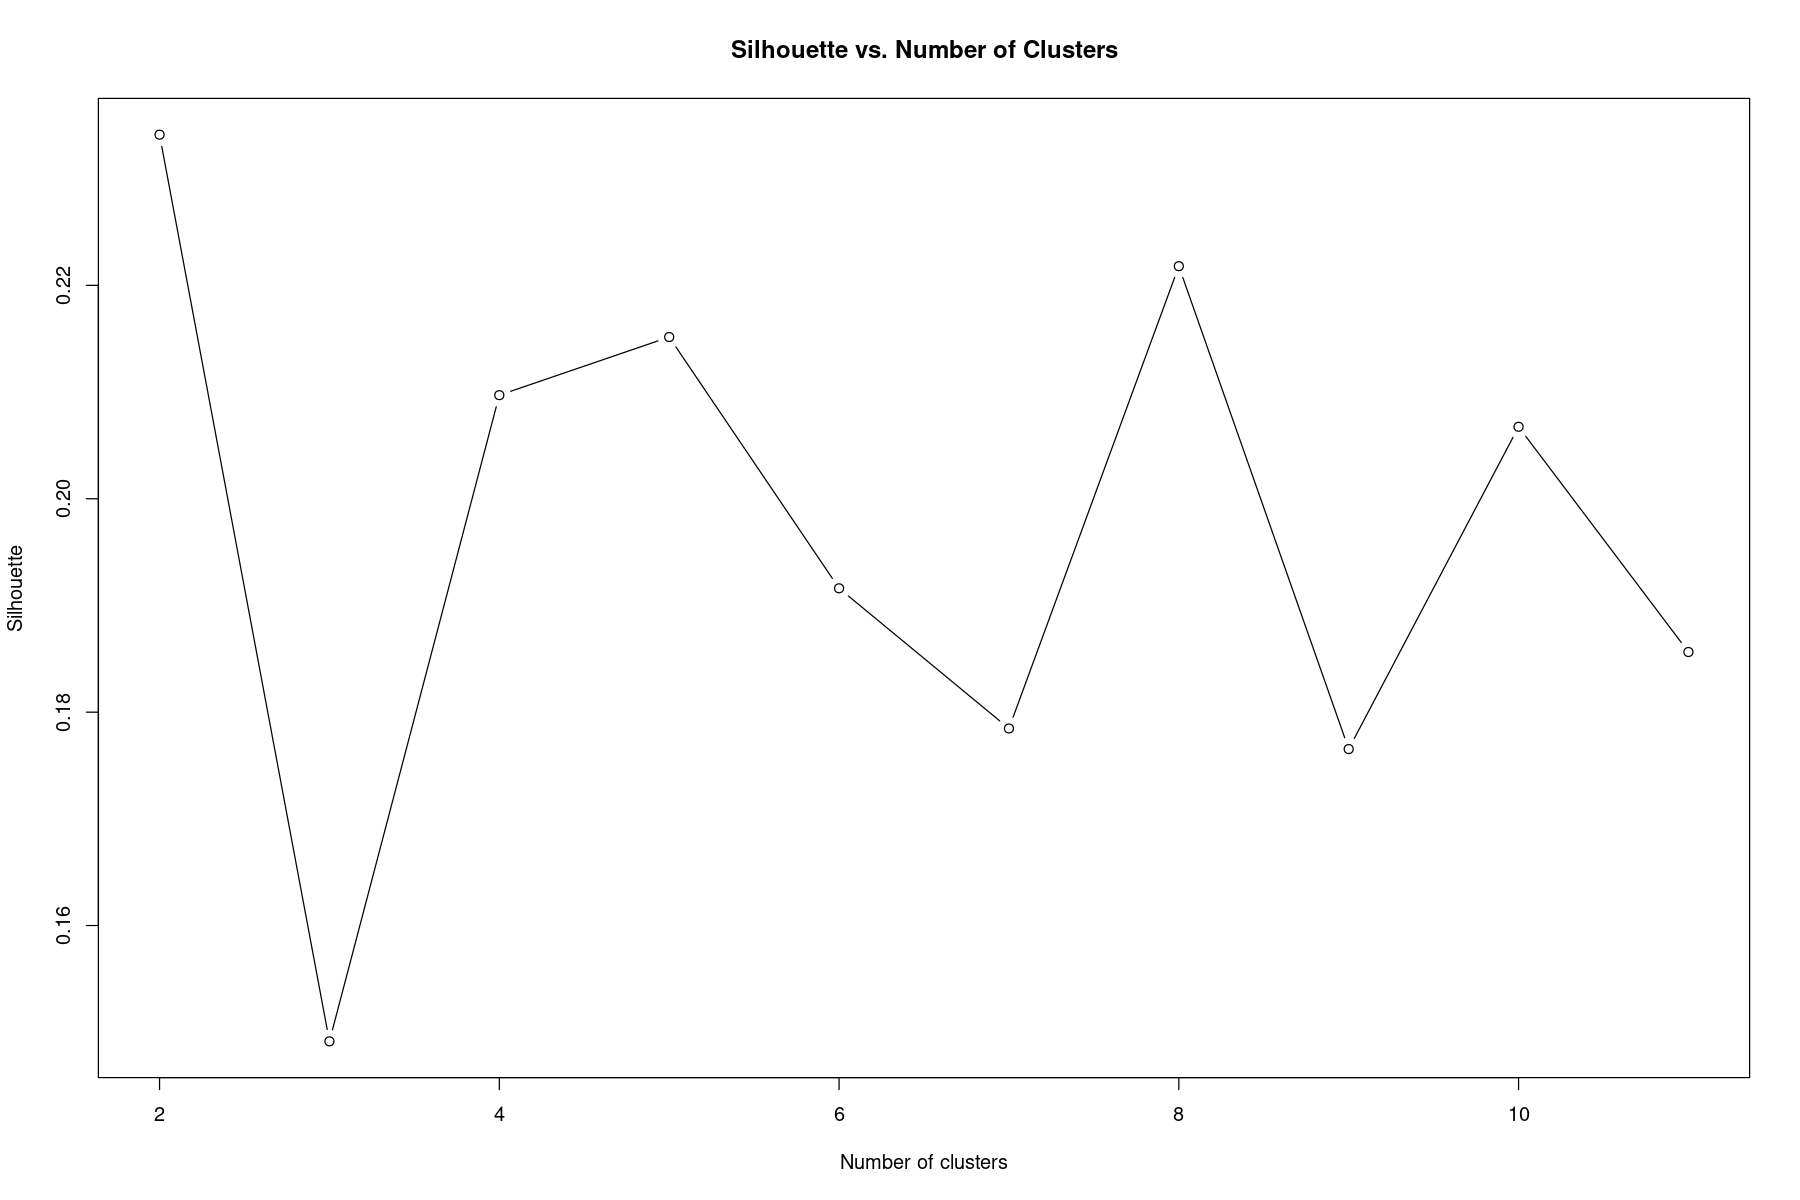

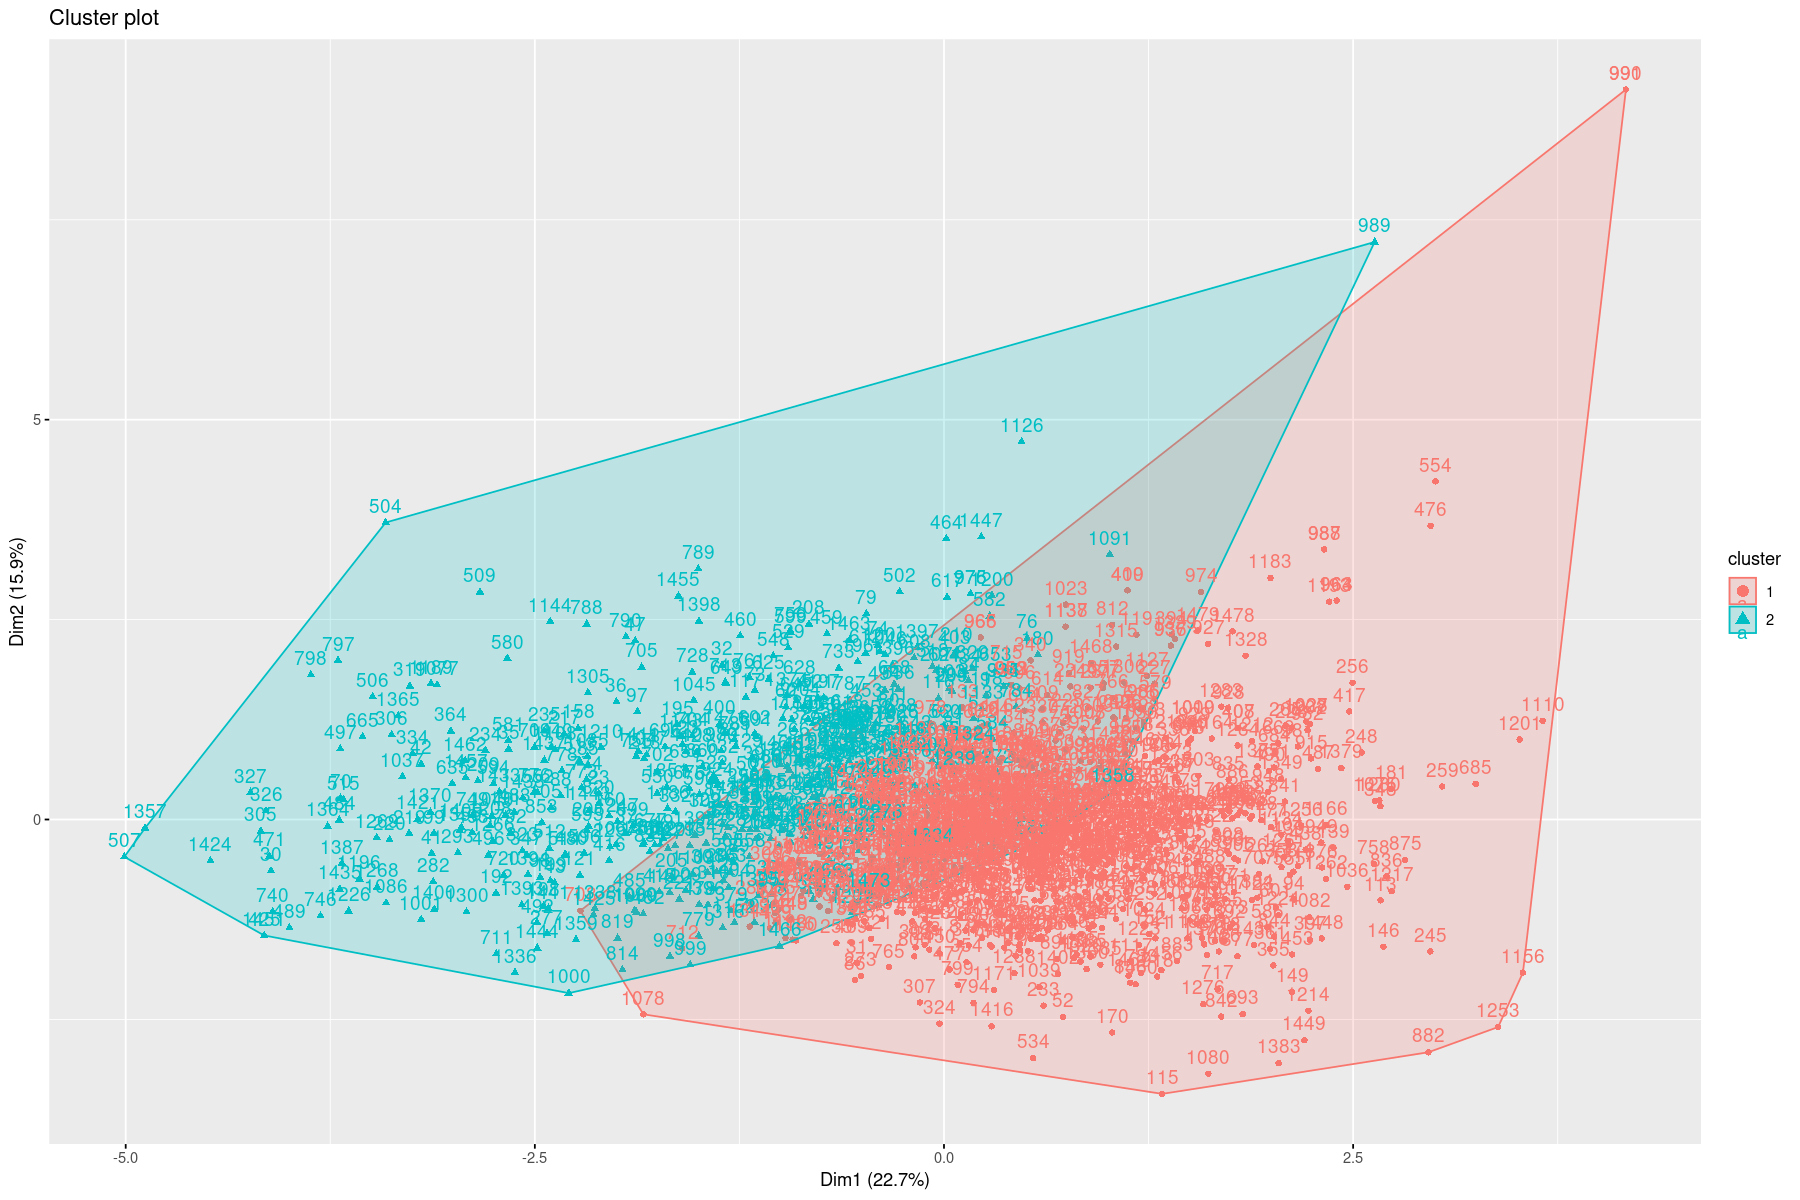

[1] "Best cluster size for : Dunn 5"


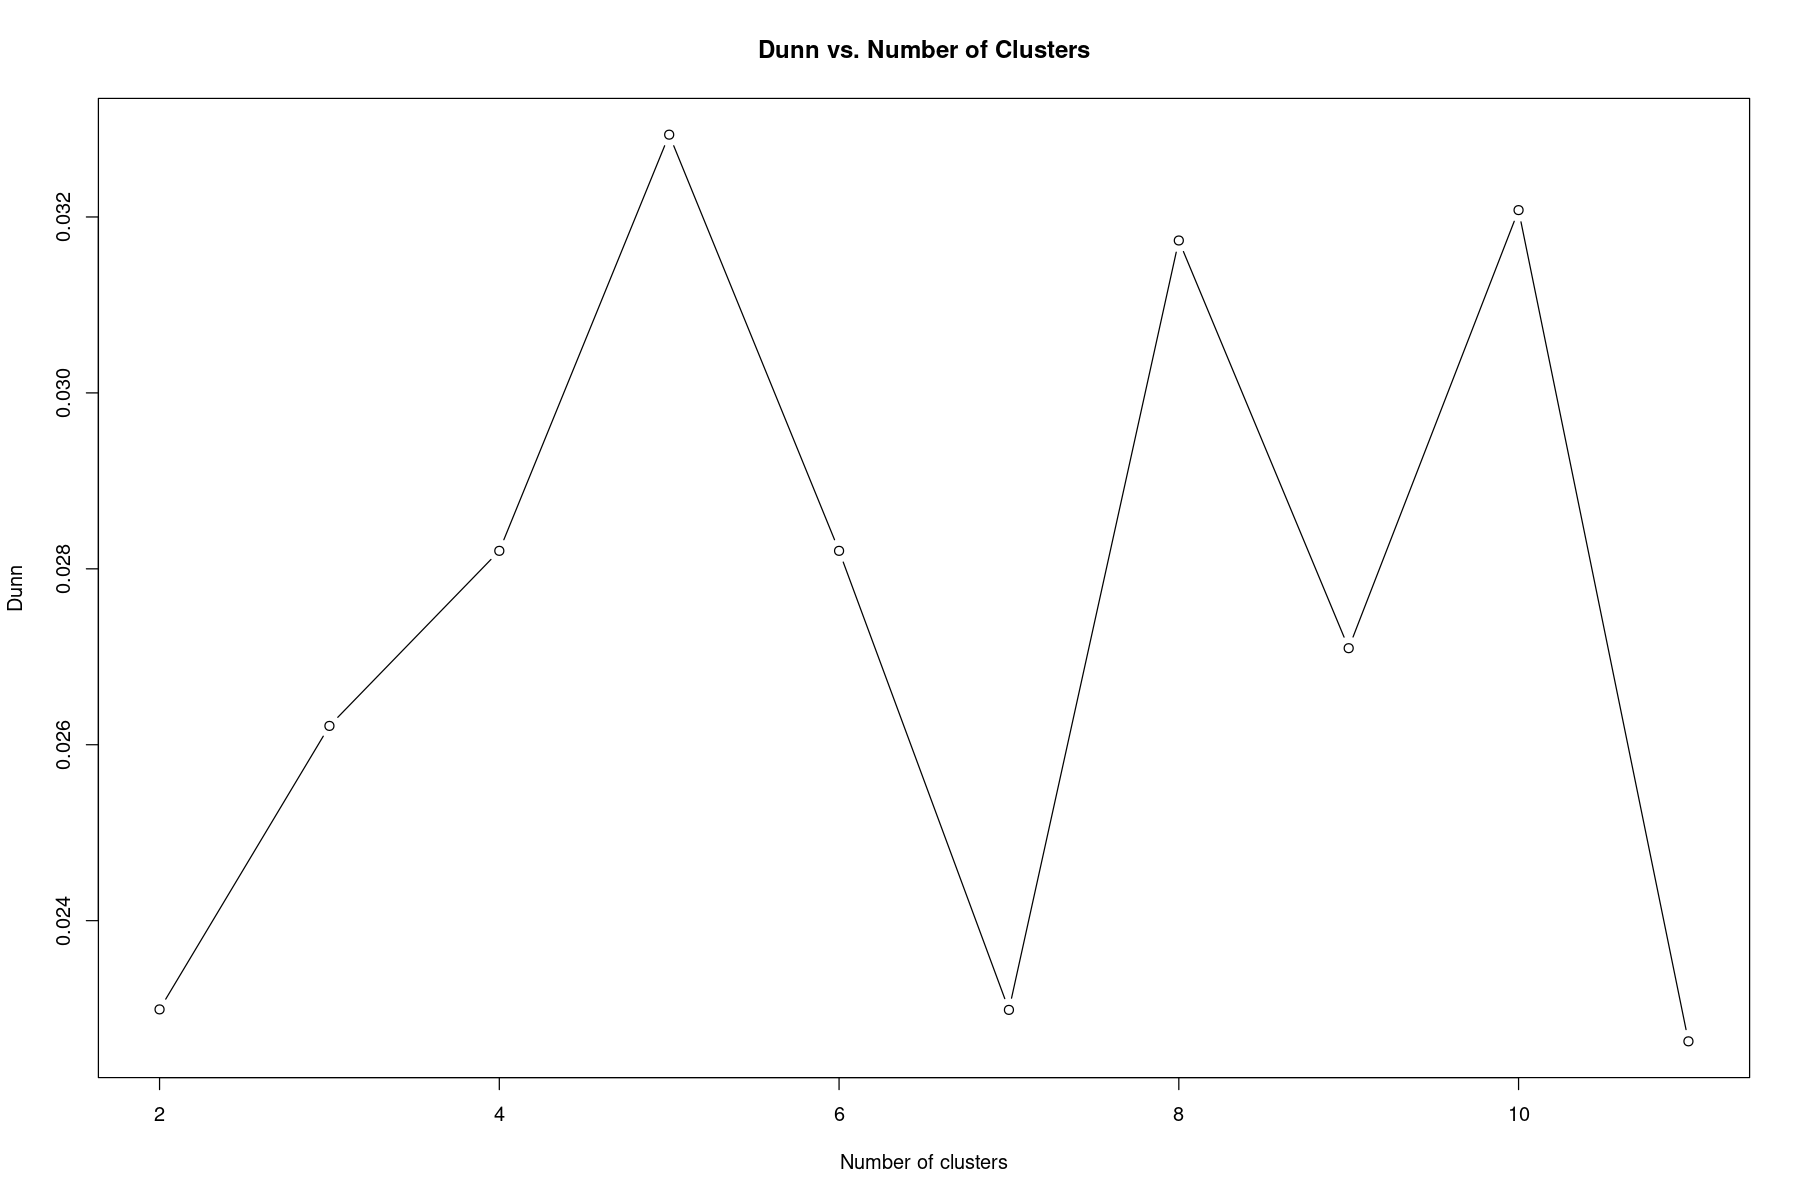

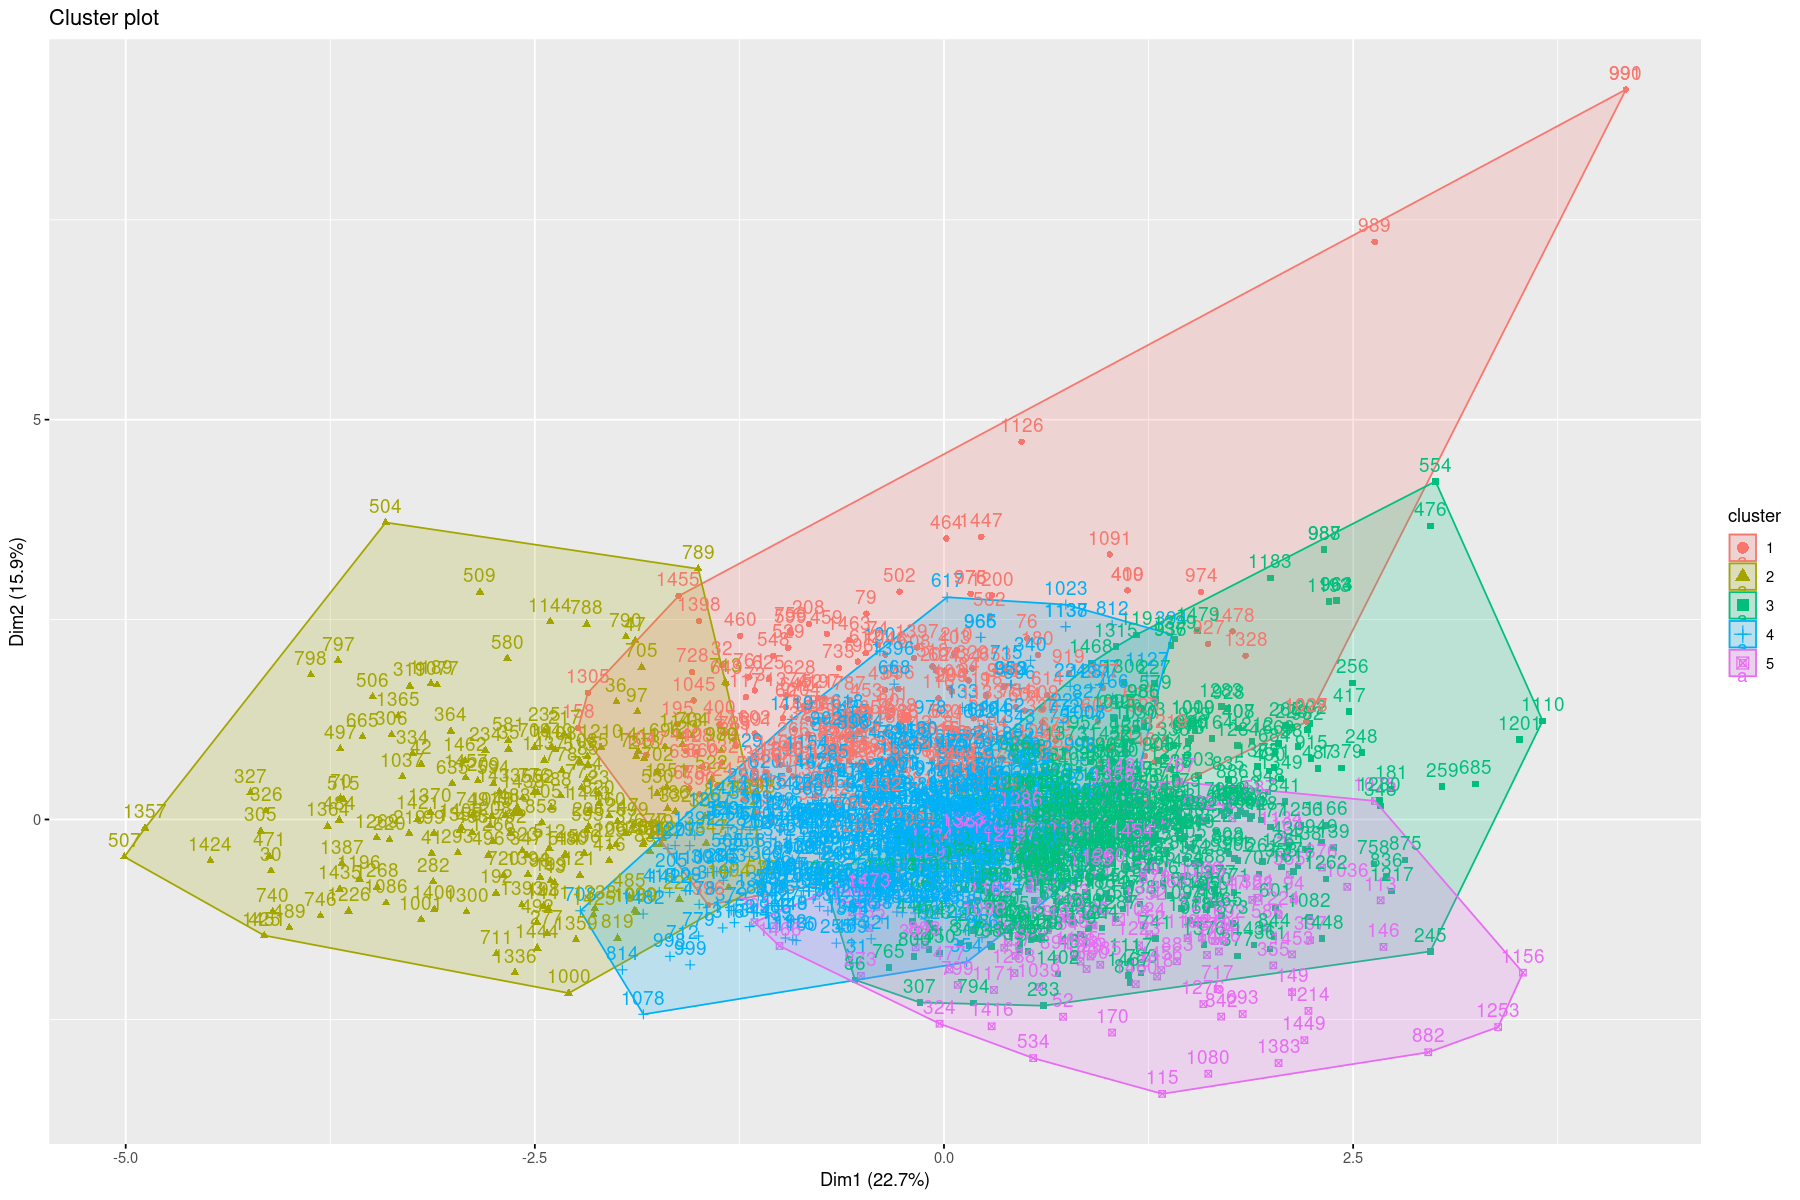

In [19]:
index_names <- list(
                    list("Calinski_Harabasz", FALSE), 
                    list("Davies_Bouldin", TRUE),
                    list("Silhouette", FALSE),
                    list("Dunn", FALSE)
                )
labels <- unique(yeast[10])
map_convert <- function(e) {
    return (which(labels == e))
}
for (index_vec in index_names) {
    index_name <- index_vec[[1]]
    use_min <- index_vec[[2]]
    best_cluster_size <- get_best_nb_clusters(yeast[col_numeric], 
                                              index_name,
                                              use_min = use_min,graph = TRUE)
    print(paste("Best cluster size for :", index_name, best_cluster_size))
    # purity if we have 10 clusters ---------
    if (best_cluster_size == 10) {
        kmeans_result <- kmeans(yeast[col_numeric], centers = best_cluster_size)
        y <- sapply(yeast[, 10], map_convert)
        print(table(kmeans_result$cluster))
        purity_score <- purity(y, kmeans_result$cluster)
        print(paste("Purity :", purity_score$pur))
    }
    # end purity -----------
    kmeans_result <- kmeans(yeast[col_numeric], centers = best_cluster_size)
    print(fviz_cluster(kmeans_result, data = yeast[col_numeric]))
}